Install library


In [1]:
!pip install pycbc lalsuite h5py




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.9/73.9 kB 1.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.6/128.6 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━

In [2]:
!pip install torch==2.1.2 torchvision==0.16.2 torchaudio==2.1.2 "numpy<2.0" --index-url https://download.pytorch.org/whl/cu121


Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 GB 498.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 88.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 68.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 84.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 MB 8.6 MB/s eta 0:00:00
  Attempting uninstall: triton
    Found existing installation: triton 3.2.0
    Uninstalling triton-3.2.0:
      Successfully uninstalled triton-3.2.0
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: torch
    Found existing installation: torch 2.6.0+cu124
    Uninstalling torch-2.6.0+cu124:
      Successfully uninstalled torch-2.6.0+cu124
  Attempting uninstall: torchvision
    Found existing installation: torchvi

In [ ]:
!git clone https://github.com/ondrzel/ml-gw-search.git


Cloning into 'ml-gw-search'...
remote: Enumerating objects: 898, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 898 (delta 8), reused 50 (delta 5), pack-reused 839 (from 1)
Receiving objects: 100% (898/898), 215.55 MiB | 35.53 MiB/s, done.
Resolving deltas: 100% (46/46), done.
Updating files: 100% (825/825), done.


In [ ]:
%cd /content/ml-gw-search/mlgwsc-1

/content/ml-gw-search/mlgwsc-1


In [ ]:
!ls -l

total 2588
-rwxr-xr-x  1 root root   31592 Aug 12 14:09 apply.py
-rw-r--r--  1 root root 2551996 Aug 12 14:09 best_state_dict.pt
-rwxr-xr-x  1 root root   14725 Aug 12 14:09 gen.py
-rwxr-xr-x  1 root root    7663 Aug 12 14:09 slice_real_noise.py
-rwxr-xr-x  1 root root    4510 Aug 12 14:09 split_noise_file.py
drwxr-xr-x 10 root root    4096 Aug 12 14:09 timed
-rwxr-xr-x  1 root root   14562 Aug 12 14:09 train.py
-rwxr-xr-x  1 root root    5680 Aug 12 14:09 whiten.py


In [ ]:
!ls -l train.py

-rwxr-xr-x 1 root root 14562 Aug 12 06:08 train.py


In [ ]:
import h5py
import numpy as np

In [ ]:
import torch
import numpy as np
import h5py
import matplotlib.pyplot as plt
from pycbc.waveform import get_td_waveform
from apply import get_coherent_network
import subprocess



Generating training and validation data

In [ ]:
!python gen.py -o test1_data.hdf -a IMRPhenomXPHM -d 2 --training-samples 10000 10000 --validation-samples 2000 2000 --verbose --debug

Streaming output truncated to the last 5000 lines.
DEBUG | 18-07-2025 14:56:04: Starting new sample
DEBUG | 18-07-2025 14:56:04: Whitening noise
DEBUG | 18-07-2025 14:56:04: Noise whitened
DEBUG | 18-07-2025 14:56:04: Starting new sample
DEBUG | 18-07-2025 14:56:04: Whitening noise
DEBUG | 18-07-2025 14:56:04: Noise whitened
DEBUG | 18-07-2025 14:56:04: Starting new sample
DEBUG | 18-07-2025 14:56:04: Whitening noise
DEBUG | 18-07-2025 14:56:04: Noise whitened
DEBUG | 18-07-2025 14:56:04: Starting new sample
DEBUG | 18-07-2025 14:56:04: Whitening noise
DEBUG | 18-07-2025 14:56:04: Noise whitened
DEBUG | 18-07-2025 14:56:04: Starting new sample
DEBUG | 18-07-2025 14:56:04: Whitening noise
DEBUG | 18-07-2025 14:56:04: Noise whitened
DEBUG | 18-07-2025 14:56:04: Starting new sample
DEBUG | 18-07-2025 14:56:04: Whitening noise
DEBUG | 18-07-2025 14:56:04: Noise whitened
DEBUG | 18-07-2025 14:56:04: Starting new sample
DEBUG | 18-07-2025 14:56:04: Whitening noise
DEBUG | 18-07-2025 14:56:04

Training on the data generated

In [ ]:
!python train.py -d /content/ml-gw-search/mlgwsc-1/test1_data.hdf -o /content/ml-gw-search/mlgwsc-1/model_dict --epochs 20 --batch-size 32 --train-device cuda


In [ ]:
!python train.py -d test1_data.hdf -o /content/ml-gw-search/mlgwsc-1/model_dict --epochs 20 --batch-size 32 --verbose --debug

Streaming output truncated to the last 5000 lines.
Iterating over training dataset:  16% 97/625 [00:31<02:46,  3.17it/s]
Iterating over training dataset:  16% 98/625 [00:32<02:39,  3.31it/s]
Iterating over training dataset:  16% 99/625 [00:32<02:42,  3.24it/s]
Iterating over training dataset:  16% 100/625 [00:32<02:41,  3.24it/s]
Iterating over training dataset:  16% 101/625 [00:33<02:36,  3.35it/s]
Iterating over training dataset:  16% 102/625 [00:33<02:37,  3.32it/s]
Iterating over training dataset:  16% 103/625 [00:33<02:35,  3.36it/s]
Iterating over training dataset:  17% 104/625 [00:33<02:33,  3.39it/s]
Iterating over training dataset:  17% 105/625 [00:34<02:32,  3.41it/s]
Iterating over training dataset:  17% 106/625 [00:34<02:32,  3.40it/s]
Iterating over training dataset:  17% 107/625 [00:34<02:31,  3.42it/s]
Iterating over training dataset:  17% 108/625 [00:35<02:32,  3.40it/s]
Iterating over training dataset:  17% 109/625 [00:35<02:30,  3.43it/s]
Iterating over training datas

In [ ]:
!pip install ligo-segments


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ligo-segments: filename=ligo_segments-1.4.0-cp311-cp311-linux_x86_64.whl size=102031 sha256=da9166b1b905fd90280e27df710ada7de72206e02782b1f82133dc9e0dcdff08
  Stored in directory: /root/.cache/pip/wheels/02/2b/93/c2ee2b6f4ea9572ee4f5ade0115c4bd0887be6228328740dae
Successfully built ligo-segments


In [ ]:
import ligo.segments

In [ ]:
!git clone https://github.com/gwastro/ml-mock-data-challenge-1.git
%cd ml-mock-data-challenge-1
       # installs PyCBC, numpy, h5py, etc.


Cloning into 'ml-mock-data-challenge-1'...
remote: Enumerating objects: 3850, done.
remote: Counting objects: 100% (446/446), done.
remote: Compressing objects: 100% (259/259), done.
remote: Total 3850 (delta 181), reused 418 (delta 175), pack-reused 3404 (from 1)
Receiving objects: 100% (3850/3850), 279.69 MiB | 18.16 MiB/s, done.
Resolving deltas: 100% (241/241), done.
Updating files: 100% (3405/3405), done.
/content/ml-gw-search/mlgwsc-1/ml-mock-data-challenge-1


Generating Test data

In [ ]:
!python generate_data.py \
    -d 1 \
    -i injected_signals.hdf \
    -f foreground_data.hdf \
    -b background_data.hdf \
    --duration 20480 \
    --generate-duration 2048 \
    --seed 42 \
    --verbose \
    --force



INFO | 23-07-2025 15:01:55: Getting noise
Traceback (most recent call last):
  File "/content/ml-gw-search/mlgwsc-1/ml-mock-data-challenge-1/generate_data.py", line 837, in <module>
    main(__doc__)
  File "/content/ml-gw-search/mlgwsc-1/ml-mock-data-challenge-1/generate_data.py", line 757, in main
    get_noise(args.data_set, start_offset=args.start_offset,
  File "/content/ml-gw-search/mlgwsc-1/ml-mock-data-challenge-1/generate_data.py", line 511, in get_noise
    noise = noi_gen(seg[0], seg[1],
            ^^^^^^^^^^^^^^^^^^^^^^^
  File "/content/ml-gw-search/mlgwsc-1/ml-mock-data-challenge-1/generate_data.py", line 351, in __call__
    return self.get(start, end, generate_duration=generate_duration)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/content/ml-gw-search/mlgwsc-1/ml-mock-data-challenge-1/generate_data.py", line 416, in get
    tmp = colored_noise(psd,
          ^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pycbc/noise

#Structure injected data file

In [ ]:
import h5py

# Path to the file
file_path = "injected_signals.hdf"

# Inspect the structure
def print_structure(name, obj):
    if isinstance(obj, h5py.Dataset):
        print(f"{name}: Dataset, shape = {obj.shape}, dtype = {obj.dtype}")
    elif isinstance(obj, h5py.Group):
        print(f"{name}: Group")

with h5py.File(file_path, "r") as f:
    f.visititems(print_structure)


chirp_distance: Dataset, shape = (583779,), dtype = float64
coa_phase: Dataset, shape = (583779,), dtype = float64
dec: Dataset, shape = (583779,), dtype = float64
distance: Dataset, shape = (583779,), dtype = float64
inclination: Dataset, shape = (583779,), dtype = float64
mass1: Dataset, shape = (583779,), dtype = float64
mass2: Dataset, shape = (583779,), dtype = float64
mchirp: Dataset, shape = (583779,), dtype = float64
polarization: Dataset, shape = (583779,), dtype = float64
q: Dataset, shape = (583779,), dtype = float64
ra: Dataset, shape = (583779,), dtype = float64
tc: Dataset, shape = (583779,), dtype = float64


In [ ]:
import h5py

# Path to the file
file_path = "/content/ml-gw-search/mlgwsc-1/ml-mock-data-challenge-1/foreground_data.hdf"

# Inspect the structure
def print_structure(name, obj):
    if isinstance(obj, h5py.Dataset):
        print(f"{name}: Dataset, shape = {obj.shape}, dtype = {obj.dtype}")
    elif isinstance(obj, h5py.Group):
        print(f"{name}: Group")

with h5py.File(file_path, "r") as f:
    f.visititems(print_structure)


H1: Group
H1/1238205077: Dataset, shape = (40960,), dtype = float64
L1: Group
L1/1238205077: Dataset, shape = (40960,), dtype = float64


In [ ]:
%cd /content/ml-gw-search/mlgwsc-1

/content/ml-gw-search/mlgwsc-1


In [ ]:
!python apply.py /content/ml-gw-search/mlgwsc-1/ml-mock-data-challenge-1/background_data.hdf test1_data_trriger.hdf -w /content/ml-gw-search/mlgwsc-1/best_state_dict.pt --debug --device cpu

DEBUG | 16-07-2025 14:01:02: Initializing network.
INFO | 16-07-2025 14:22:10: A total of 75675 samples exceeded the threshold of -8.000000
INFO | 16-07-2025 14:22:10: Clustering has resulted in 16983 independent triggers. Centering triggers at their maxima.
DEBUG | 16-07-2025 14:22:10: Saving clustered triggers into test1_data_trriger.hdf.
DEBUG | 16-07-2025 14:22:10: Triggers saved, closing file.


# Showing number of siganl detected on threshold

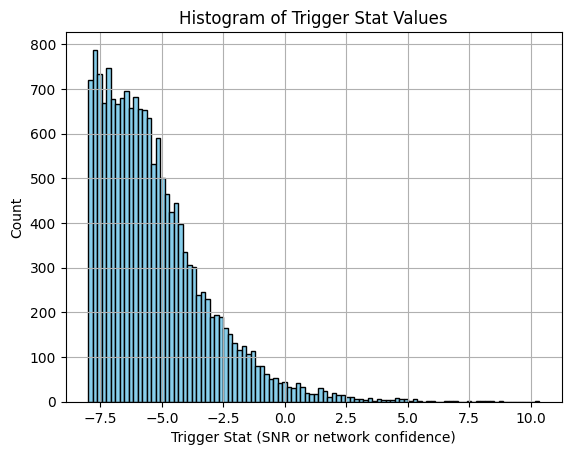

In [ ]:
import h5py
import matplotlib.pyplot as plt

with h5py.File("/content/drive/MyDrive/test1_data_trriger.hdf", "r") as f:
    stat = f["stat"][:]

plt.hist(stat, bins=100, color="skyblue", edgecolor="black")
plt.xlabel("Trigger Stat (SNR or network confidence)")
plt.ylabel("Count")
plt.title("Histogram of Trigger Stat Values")
plt.grid(True)
plt.show()


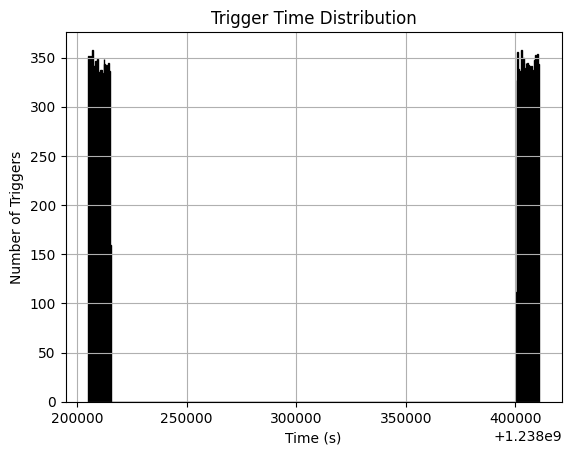

In [ ]:
with h5py.File("/content/drive/MyDrive/test1_data_trriger.hdf", "r") as f:
    time = f["time"][:]

plt.hist(time, bins=500, color="lightcoral", edgecolor="black")
plt.xlabel("Time (s)")
plt.ylabel("Number of Triggers")
plt.title("Trigger Time Distribution")
plt.grid(True)
plt.show()


# Training and validation loss for 20 epochs

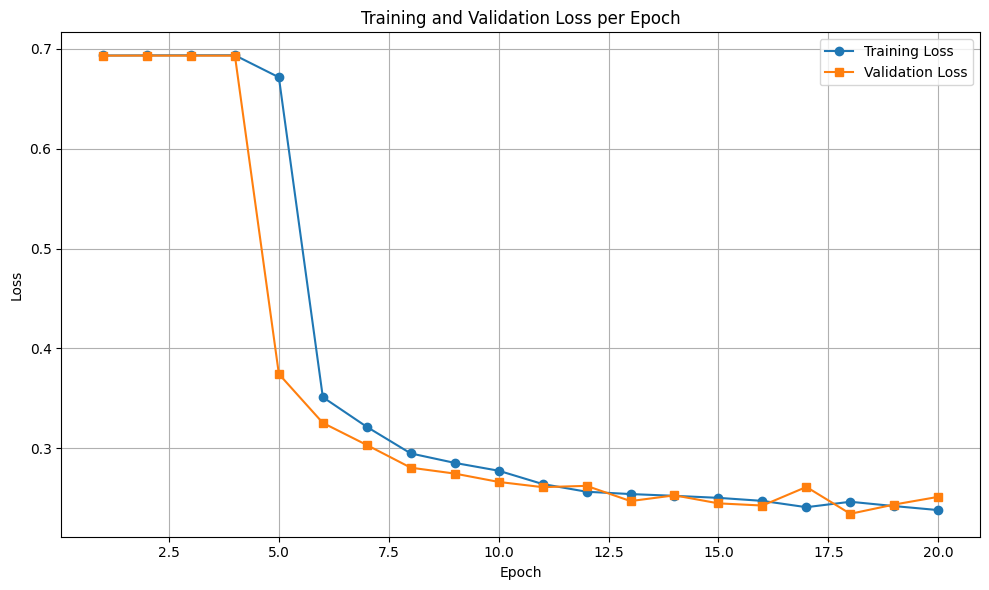

Data successfully read from file:
Number of epochs: 20
Epoch range: 1 to 20
Training loss range: 0.238131 to 0.693520
Validation loss range: 0.234427 to 0.693185


In [ ]:
import matplotlib.pyplot as plt

# Read data from losses.txt file
epochs = []
training_loss = []
validation_loss = []

with open('/content/drive/MyDrive/losses(1).txt', 'r') as file:
    for line in file:
        # Split the line by whitespace and extract epoch, training loss, and validation loss
        parts = line.strip().split()
        if len(parts) >= 3:  # Ensure we have at least 3 values per line
            epoch = int(parts[0])
            train_loss = float(parts[1])
            val_loss = float(parts[2])

            epochs.append(epoch)
            training_loss.append(train_loss)
            validation_loss.append(val_loss)

# Plotting the training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss per Epoch')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Print the data to verify it was read correctly
print("Data successfully read from file:")
print(f"Number of epochs: {len(epochs)}")
print(f"Epoch range: {min(epochs)} to {max(epochs)}")
print(f"Training loss range: {min(training_loss):.6f} to {max(training_loss):.6f}")
print(f"Validation loss range: {min(validation_loss):.6f} to {max(validation_loss):.6f}")

In [ ]:
%cd /content/ml-gw-search/mlgwsc-1

/content/ml-gw-search/mlgwsc-1


In [ ]:
!python apply.py /content/drive/MyDrive/background_data.hdf test1_trained_data_trriger.hdf -w /content/drive/MyDrive/best_state_dict\(3\).pt --debug --device cuda

DEBUG | 19-07-2025 04:01:59: Initializing network.
INFO | 19-07-2025 04:04:49: A total of 205580 samples exceeded the threshold of -8.000000
INFO | 19-07-2025 04:04:49: Clustering has resulted in 2 independent triggers. Centering triggers at their maxima.
DEBUG | 19-07-2025 04:04:49: Saving clustered triggers into test1_trained_data_trriger.hdf.
DEBUG | 19-07-2025 04:04:49: Triggers saved, closing file.


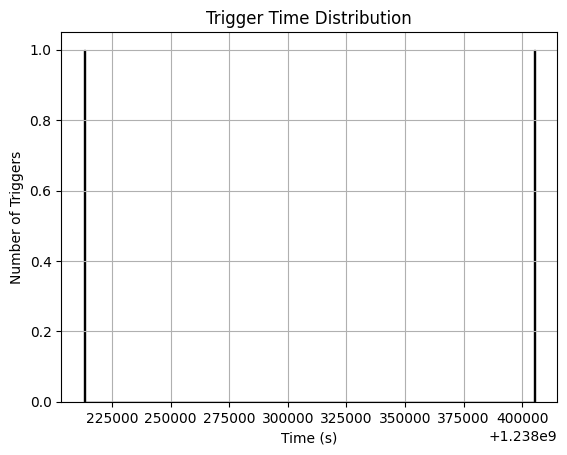

In [ ]:
with h5py.File("/content/drive/MyDrive/test1_trained_data_trriger.hdf", "r") as f:
    time = f["time"][:]

plt.hist(time, bins=500, color="lightcoral", edgecolor="black")
plt.xlabel("Time (s)")
plt.ylabel("Number of Triggers")
plt.title("Trigger Time Distribution")
plt.grid(True)
plt.show()


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!python gen.py -o test_large_data.hdf -a IMRPhenomXPHM -d 2 --training-samples 100 100 --validation-samples 20 20 --verbose --debug

DEBUG | 23-07-2025 14:02:55: Generating training dataset.
INFO | 23-07-2025 14:02:55: Generating dataset with 100 injections and 100 pure noise samples
  0% 0/200 [00:00<?, ?it/s]DEBUG | 23-07-2025 14:02:55: Whitening noise
DEBUG | 23-07-2025 14:02:56: Noise whitened
DEBUG | 23-07-2025 14:02:56: Starting new sample
DEBUG | 23-07-2025 14:02:56: Sample includes waveform, generating parameters
DEBUG | 23-07-2025 14:02:56: Generating waveform
DEBUG | 23-07-2025 14:02:56: Waveform generated
DEBUG | 23-07-2025 14:02:56: Computing network SNR of strain at float64 using PSD at float64
DEBUG | 23-07-2025 14:02:56: Waveform generated and projected, whitening
DEBUG | 23-07-2025 14:02:56: Waveform whitened
  0% 1/200 [00:01<03:25,  1.03s/it]DEBUG | 23-07-2025 14:02:56: Whitening noise
DEBUG | 23-07-2025 14:02:56: Noise whitened
DEBUG | 23-07-2025 14:02:56: Starting new sample
DEBUG | 23-07-2025 14:02:56: Sample includes waveform, generating parameters
DEBUG | 23-07-2025 14:02:56: Generating wavefo

In [ ]:
!python /content/ml-gw-search/mlgwsc-1/gen.py -o /content/sample_data/test1_large_data.hdf -a IMRPhenomXPHM -d 2 --training-samples 100 100 --validation-samples 20 20 --verbose --debug

DEBUG | 24-07-2025 14:48:48: Generating training dataset.
INFO | 24-07-2025 14:48:48: Generating dataset with 100 injections and 100 pure noise samples
  0% 0/200 [00:00<?, ?it/s]DEBUG | 24-07-2025 14:48:48: Whitening noise
DEBUG | 24-07-2025 14:48:48: Noise whitened
DEBUG | 24-07-2025 14:48:48: Starting new sample
DEBUG | 24-07-2025 14:48:48: Sample includes waveform, generating parameters
DEBUG | 24-07-2025 14:48:48: Generating waveform
DEBUG | 24-07-2025 14:48:49: Waveform generated
DEBUG | 24-07-2025 14:48:49: Computing network SNR of strain at float64 using PSD at float64
DEBUG | 24-07-2025 14:48:49: Waveform generated and projected, whitening
DEBUG | 24-07-2025 14:48:49: Waveform whitened
  0% 1/200 [00:00<01:08,  2.89it/s]DEBUG | 24-07-2025 14:48:49: Whitening noise
DEBUG | 24-07-2025 14:48:49: Noise whitened
DEBUG | 24-07-2025 14:48:49: Starting new sample
DEBUG | 24-07-2025 14:48:49: Sample includes waveform, generating parameters
DEBUG | 24-07-2025 14:48:49: Generating wavefo

In [ ]:
!python apply.py /content/drive/MyDrive/background_data.hdf test1_trained_data_trriger.hdf -w /content/drive/MyDrive/best_state_dict\(3\).pt --debug --device cuda

DEBUG | 19-07-2025 04:01:59: Initializing network.
INFO | 19-07-2025 04:04:49: A total of 205580 samples exceeded the threshold of -8.000000
INFO | 19-07-2025 04:04:49: Clustering has resulted in 2 independent triggers. Centering triggers at their maxima.
DEBUG | 19-07-2025 04:04:49: Saving clustered triggers into test1_trained_data_trriger.hdf.
DEBUG | 19-07-2025 04:04:49: Triggers saved, closing file.


In [ ]:
import h5py

def print_full_structure(name, obj):
    indent = "  " * name.count('/')
    if isinstance(obj, h5py.Group):
        print(f"{indent}{name}/ : Group")
    elif isinstance(obj, h5py.Dataset):
        print(f"{indent}{name} : Dataset, shape = {obj.shape}, dtype = {obj.dtype}")

file_path = "test_large_data.hdf"

with h5py.File(file_path, "r") as f:
    print("📁 File structure for training and validation:")
    f["training"].visititems(print_full_structure)
    print("\n" + "="*60 + "\n")
    f["validation"].visititems(print_full_structure)


📁 File structure for training and validation:
noises : Dataset, shape = (200, 2, 2048), dtype = float32
waveforms : Dataset, shape = (100, 2, 2048), dtype = float32


noises : Dataset, shape = (40, 2, 2048), dtype = float32
waveforms : Dataset, shape = (20, 2, 2048), dtype = float32


In [ ]:
import h5py
import numpy as np

# Path to the file
file_path = "test_large_data.hdf"

def print_detailed_structure(name, obj):
    if isinstance(obj, h5py.Dataset):
        print(f"\n{name}: Dataset")
        print(f"  Shape: {obj.shape}")
        print(f"  Dtype: {obj.dtype}")
        print(f"  Size: {obj.size} elements")
        print(f"  Memory size: {obj.nbytes / (1024**2):.2f} MB")

        # Show some sample data (first few elements)
        if obj.size > 0:
            print(f"  Min value: {np.min(obj[:]):.6f}")
            print(f"  Max value: {np.max(obj[:]):.6f}")
            print(f"  Mean value: {np.mean(obj[:]):.6f}")
            print(f"  Std deviation: {np.std(obj[:]):.6f}")

            # Show sample of actual data
            if len(obj.shape) == 3:  # 3D array like (samples, channels, time)
                print(f"  Sample data shape for first item: {obj[0].shape}")
                print(f"  First sample, first channel, first 10 values:")
                print(f"    {obj[0, 0, :10]}")
                print(f"  First sample, second channel, first 10 values:")
                print(f"    {obj[0, 1, :10]}")
            else:
                # For other shapes, show first few elements
                flat_data = obj[...].flatten()
                print(f"  First 10 values (flattened): {flat_data[:10]}")

    elif isinstance(obj, h5py.Group):
        print(f"\n{name}: Group")
        print(f"  Contains {len(obj.keys())} items: {list(obj.keys())}")

# Inspect the complete structure
with h5py.File(file_path, "r") as f:
    print("=== HDF5 File Structure ===")
    f.visititems(print_detailed_structure)

    print("\n=== Additional Analysis ===")

    # Direct access to specific datasets for more detailed analysis
    training_noises = f['training/noises']
    training_waveforms = f['training/waveforms']

    print(f"\nTraining data comparison:")
    print(f"Noises shape: {training_noises.shape} | Waveforms shape: {training_waveforms.shape}")
    print(f"Noises range: [{np.min(training_noises[:]):.6f}, {np.max(training_noises[:]):.6f}]")
    print(f"Waveforms range: [{np.min(training_waveforms[:]):.6f}, {np.max(training_waveforms[:]):.6f}]")

    # Check if data looks normalized or has specific patterns
    print(f"\nData characteristics:")
    print(f"Training noises - Mean: {np.mean(training_noises[:]):.6f}, Std: {np.std(training_noises[:]):.6f}")
    print(f"Training waveforms - Mean: {np.mean(training_waveforms[:]):.6f}, Std: {np.std(training_waveforms[:]):.6f}")

    # Show shape interpretation
    print(f"\nShape interpretation (assuming format: samples × channels × time_points):")
    print(f"Training noises: {training_noises.shape[0]} samples, {training_noises.shape[1]} channels, {training_noises.shape[2]} time points")
    print(f"Training waveforms: {training_waveforms.shape[0]} samples, {training_waveforms.shape[1]} channels, {training_waveforms.shape[2]} time points")

=== HDF5 File Structure ===

training: Group
  Contains 2 items: ['noises', 'waveforms']

training/noises: Dataset
  Shape: (200, 2, 2048)
  Dtype: float32
  Size: 819200 elements
  Memory size: 3.12 MB
  Min value: -171.141602
  Max value: 146.097412
  Mean value: 0.001963
  Std deviation: 31.625137
  Sample data shape for first item: (2, 2048)
  First sample, first channel, first 10 values:
    [-71.90353    59.808384   48.29418     5.1221695  -2.951912  -26.394817
  21.453459   -4.0962744 -11.201244   43.52714  ]
  First sample, second channel, first 10 values:
    [  3.0088537  11.025515    2.0384288  35.417686   18.123833  -16.114363
  23.29274    15.423666   -1.4911195  13.659909 ]

training/waveforms: Dataset
  Shape: (100, 2, 2048)
  Dtype: float32
  Size: 409600 elements
  Memory size: 1.56 MB
  Min value: -7.084834
  Max value: 6.685540
  Mean value: 0.000019
  Std deviation: 0.493735
  Sample data shape for first item: (2, 2048)
  First sample, first channel, first 10 values

In [ ]:
import h5py
import numpy as np

# Path to the HDF5 file
file_path = "/content/ml-gw-search/mlgwsc-1/ml-mock-data-challenge-1/foreground_data.hdf"  # Change this to your file path

def print_detector_structure(name, obj):
    if isinstance(obj, h5py.Dataset):
        print(f"\n{name}: Dataset")
        print(f"  Shape: {obj.shape}")
        print(f"  Dtype: {obj.dtype}")
        print(f"  Size: {obj.size} elements")
        print(f"  Memory size: {obj.nbytes / (1024**2):.2f} MB")

        # Basic statistics
        data = obj[...]
        print(f"  Min value: {np.min(data):.6f}")
        print(f"  Max value: {np.max(data):.6f}")
        print(f"  Mean value: {np.mean(data):.6f}")
        print(f"  Std deviation: {np.std(data):.6f}")

        # Sample data
        flat_data = data.flatten()
        print(f"  First 10 values: {flat_data[:10]}")

    elif isinstance(obj, h5py.Group):
        print(f"\n{name}: Group")
        print(f"  Contains {len(obj.keys())} datasets: {list(obj.keys())}")

# Open and inspect the file
with h5py.File(file_path, "r") as f:
    print("=== HDF5 File Structure for Detectors (H1/L1) ===")
    f.visititems(print_detector_structure)

    print("\n=== Summary ===")
    for detector in ["H1", "L1"]:
        if detector in f:
            for key in f[detector].keys():
                data = f[detector][key][:]
                print(f"\n{detector}/{key} — shape: {data.shape}")
                print(f"  Min: {np.min(data):.6f}, Max: {np.max(data):.6f}, Mean: {np.mean(data):.6f}, Std: {np.std(data):.6f}")
                print(f"  First 10 values: {data[:10]}")
        else:
            print(f"{detector} group not found.")


=== HDF5 File Structure for Detectors (H1/L1) ===

H1: Group
  Contains 1 datasets: ['1238205077']

H1/1238205077: Dataset
  Shape: (40960,)
  Dtype: float64
  Size: 40960 elements
  Memory size: 0.31 MB
  Min value: -0.000000
  Max value: 0.000000
  Mean value: -0.000000
  Std deviation: 0.000000
  First 10 values: [ 2.89357521e-22 -1.29222364e-23  2.42358819e-22 -1.30337973e-22
  1.78210564e-22  1.13415617e-22  7.89246937e-23  1.35217985e-23
 -5.50006870e-24  1.25530665e-22]

L1: Group
  Contains 1 datasets: ['1238205077']

L1/1238205077: Dataset
  Shape: (40960,)
  Dtype: float64
  Size: 40960 elements
  Memory size: 0.31 MB
  Min value: -0.000000
  Max value: 0.000000
  Mean value: -0.000000
  Std deviation: 0.000000
  First 10 values: [-4.79231398e-23 -3.00839888e-22 -1.45990767e-22 -2.59273236e-22
 -2.27604995e-22 -1.04196345e-22 -1.72088170e-22 -7.43713385e-23
 -3.46032240e-22 -2.96551242e-22]

=== Summary ===

H1/1238205077 — shape: (40960,)
  Min: -0.000000, Max: 0.000000, Mea

In [ ]:
!python train.py -d test_large_data.hdf test1_large_data.hdf -o /content/ml-gw-search/mlgwsc-1/model --epochs 5 --batch-size 32 --verbose --debug

DEBUG | 23-07-2025 14:12:14: Loading datasets from test_large_data.hdf.
DEBUG | 23-07-2025 14:12:14: Loading datasets from test1_large_data.hdf.
DEBUG | 23-07-2025 14:12:14: Datasets loaded.
DEBUG | 23-07-2025 14:12:14: Initializing network.
DEBUG | 23-07-2025 14:12:14: Setting up datasets and data loaders.
DEBUG | 23-07-2025 14:12:14: Initializing loss function, optimizer and output file.
Optimizing network:   0% 0/5 [00:00<?, ?it/s]
Iterating over training dataset:   0% 0/13 [00:00<?, ?it/s]
Iterating over training dataset:   8% 1/13 [00:01<00:15,  1.26s/it]
Iterating over training dataset:  15% 2/13 [00:01<00:09,  1.12it/s]
Iterating over training dataset:  23% 3/13 [00:02<00:07,  1.31it/s]
Iterating over training dataset:  31% 4/13 [00:03<00:06,  1.40it/s]
Iterating over training dataset:  38% 5/13 [00:03<00:05,  1.35it/s]
Iterating over training dataset:  46% 6/13 [00:04<00:05,  1.19it/s]
Iterating over training dataset:  54% 7/13 [00:05<00:05,  1.12it/s]
Iterating over training d

In [ ]:
!python train.py -d test1_large_data.hdf -o /content/ml-gw-search/mlgwsc-1/model_test --epochs 5 --batch-size 32 --verbose --debug

DEBUG | 23-07-2025 14:19:58: Loading datasets from test1_large_data.hdf.
DEBUG | 23-07-2025 14:19:58: Datasets loaded.
DEBUG | 23-07-2025 14:19:58: Initializing network.
DEBUG | 23-07-2025 14:19:58: Setting up datasets and data loaders.
DEBUG | 23-07-2025 14:19:58: Initializing loss function, optimizer and output file.
Optimizing network:   0% 0/5 [00:00<?, ?it/s]
Iterating over training dataset:   0% 0/7 [00:00<?, ?it/s]
Iterating over training dataset:  14% 1/7 [00:00<00:04,  1.40it/s]
Iterating over training dataset:  29% 2/7 [00:01<00:03,  1.48it/s]
Iterating over training dataset:  43% 3/7 [00:02<00:02,  1.51it/s]
Iterating over training dataset:  57% 4/7 [00:02<00:01,  1.51it/s]
Iterating over training dataset:  71% 5/7 [00:03<00:01,  1.47it/s]
Iterating over training dataset:  86% 6/7 [00:04<00:00,  1.24it/s]
Iterating over training dataset: 100% 7/7 [00:04<00:00,  1.55it/s]
                                                                  
Computing validation loss:   0% 0/1 [0

In [ ]:
import h5py
import os

input_file = "/content/ml-gw-search/mlgwsc-1/test1_large_data.hdf"
output_file = "waveforms_only.hdf"

with h5py.File(input_file, "r") as f_in, h5py.File(output_file, "w") as f_out:
    for group_name in ["training", "validation"]:
        if group_name in f_in:
            # Create group in output file
            grp_out = f_out.create_group(group_name)

            # Copy only the waveforms dataset
            if "waveforms" in f_in[group_name]:
                f_in.copy(f"{group_name}/waveforms", grp_out)

print(f"Waveforms-only HDF5 file saved as: {output_file}")


Waveforms-only HDF5 file saved as: waveforms_only.hdf


In [ ]:
import h5py
import os
import numpy as np

input_file = "/content/ml-gw-search/mlgwsc-1/test1_large_data.hdf"
output_file = "/content/sample_data/waveform_data_h1_l1_split.hdf"

with h5py.File(input_file, "r") as f_in, h5py.File(output_file, "w") as f_out:
    for group_name in ["training", "validation"]:
        if group_name in f_in and "waveforms" in f_in[group_name]:
            waveforms = f_in[group_name]["waveforms"][:]  # shape: (N, 2, 2048)
            print(f"{group_name} waveforms shape: {waveforms.shape}")

            # Split H1 and L1 (index 0 = H1, 1 = L1)
            h1_waveforms = waveforms[:, 0, :]  # shape: (N, 2048)
            l1_waveforms = waveforms[:, 1, :]  # shape: (N, 2048)

            # Save into H1 and L1 groups
            grp_h1 = f_out.require_group("H1")
            grp_l1 = f_out.require_group("L1")

            for i in range(h1_waveforms.shape[0]):
                ds_name = f"{group_name}_{i:04d}"
                grp_h1.create_dataset(ds_name, data=h1_waveforms[i])
                grp_l1.create_dataset(ds_name, data=l1_waveforms[i])

print(f"\n✅ Converted waveforms saved as H1/L1 datasets in: {output_file}")


training waveforms shape: (100, 2, 2048)
validation waveforms shape: (20, 2, 2048)

✅ Converted waveforms saved as H1/L1 datasets in: /content/sample_data/waveform_data_h1_l1_split.hdf


In [ ]:
import h5py
import os
import numpy as np

input_file = "/content/ml-gw-search/mlgwsc-1/test1_large_data.hdf"
output_file = "/content/sample_data/waveform.hdf"

# Constants
delta_t = 1 / 2048
initial_start_time = 1000000000  # You can set actual GPS time if known

with h5py.File(input_file, "r") as f_in, h5py.File(output_file, "w") as f_out:
    for group_name in ["training", "validation"]:
        if group_name in f_in and "waveforms" in f_in[group_name]:
            waveforms = f_in[group_name]["waveforms"][:]  # (N, 2, 2048)
            print(f"{group_name} waveforms shape: {waveforms.shape}")

            h1_waveforms = waveforms[:, 0, :]
            l1_waveforms = waveforms[:, 1, :]

            grp_h1 = f_out.require_group("H1")
            grp_l1 = f_out.require_group("L1")

            for i in range(h1_waveforms.shape[0]):
                ds_name = f"{group_name}_{i:04d}"
                start_time = initial_start_time + i  # or use actual times if available

                # Save H1
                ds_h1 = grp_h1.create_dataset(ds_name, data=h1_waveforms[i])
                ds_h1.attrs["delta_t"] = delta_t
                ds_h1.attrs["start_time"] = start_time

                # Save L1
                ds_l1 = grp_l1.create_dataset(ds_name, data=l1_waveforms[i])
                ds_l1.attrs["delta_t"] = delta_t
                ds_l1.attrs["start_time"] = start_time


training waveforms shape: (100, 2, 2048)
validation waveforms shape: (20, 2, 2048)


In [ ]:
!python apply.py /content/sample_data/waveform.hdf test_trained_data_trriger.hdf -w /content/ml-gw-search/mlgwsc-1/best_state_dict.pt --debug --verbose --device cpu

DEBUG | 23-07-2025 16:27:40: Initializing network.
  0% 0/120 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/pycbc/types/array.py:390: RuntimeWarning: divide by zero encountered in divide
  return self._data.__rtruediv__(other)
  1% 1/120 [00:38<1:17:12, 38.92s/it]/usr/local/lib/python3.11/dist-packages/pycbc/types/array.py:390: RuntimeWarning: divide by zero encountered in divide
  return self._data.__rtruediv__(other)
  5% 6/120 [00:39<09:07,  4.80s/it]  /usr/local/lib/python3.11/dist-packages/pycbc/types/array.py:390: RuntimeWarning: divide by zero encountered in divide
  return self._data.__rtruediv__(other)
  9% 11/120 [00:39<03:54,  2.15s/it]/usr/local/lib/python3.11/dist-packages/pycbc/types/array.py:390: RuntimeWarning: divide by zero encountered in divide
  return self._data.__rtruediv__(other)
 12% 15/120 [00:39<02:19,  1.33s/it]/usr/local/lib/python3.11/dist-packages/pycbc/types/array.py:390: RuntimeWarning: divide by zero encountered in divide
  return self._data._

In [ ]:
!python gen.py -o test_large_data.hdf -a IMRPhenomXPHM -d 2 --training-samples 1 1 --validation-samples 1 1 --verbose --debug

DEBUG | 28-07-2025 10:21:33: Generating training dataset.
INFO | 28-07-2025 10:21:33: Generating dataset with 1 injections and 1 pure noise samples
  0% 0/2 [00:00<?, ?it/s]DEBUG | 28-07-2025 10:21:34: Whitening noise
DEBUG | 28-07-2025 10:21:34: Noise whitened
DEBUG | 28-07-2025 10:21:34: Starting new sample
DEBUG | 28-07-2025 10:21:34: Sample includes waveform, generating parameters
DEBUG | 28-07-2025 10:21:34: Generating waveform
DEBUG | 28-07-2025 10:21:34: Waveform generated
DEBUG | 28-07-2025 10:21:34: Computing network SNR of strain at float64 using PSD at float64
DEBUG | 28-07-2025 10:21:34: Waveform generated and projected, whitening
DEBUG | 28-07-2025 10:21:34: Waveform whitened
 50% 1/2 [00:00<00:00,  1.02it/s]DEBUG | 28-07-2025 10:21:34: Whitening noise
DEBUG | 28-07-2025 10:21:34: Noise whitened
DEBUG | 28-07-2025 10:21:34: Starting new sample
100% 2/2 [00:00<00:00,  2.02it/s]
DEBUG | 28-07-2025 10:21:34: Generating validation dataset.
INFO | 28-07-2025 10:21:34: Generatin

In [ ]:
!python gen.py -o test_large_data1.hdf -a IMRPhenomXPHM -d 2 --training-samples 1 1 --validation-samples 1 1 --verbose --debug

DEBUG | 29-07-2025 07:38:38: Generating training dataset.
INFO | 29-07-2025 07:38:38: Generating dataset with 1 injections and 1 pure noise samples
  0% 0/2 [00:00<?, ?it/s]DEBUG | 29-07-2025 07:38:38: Whitening noise
DEBUG | 29-07-2025 07:38:38: Noise whitened
DEBUG | 29-07-2025 07:38:38: Starting new sample
DEBUG | 29-07-2025 07:38:38: Sample includes waveform, generating parameters
DEBUG | 29-07-2025 07:38:38: Generating waveform
DEBUG | 29-07-2025 07:38:38: Waveform generated
DEBUG | 29-07-2025 07:38:39: Computing network SNR of strain at float64 using PSD at float64
DEBUG | 29-07-2025 07:38:39: Waveform generated and projected, whitening
DEBUG | 29-07-2025 07:38:39: Waveform whitened
 50% 1/2 [00:00<00:00,  1.25it/s]DEBUG | 29-07-2025 07:38:39: Whitening noise
DEBUG | 29-07-2025 07:38:39: Noise whitened
DEBUG | 29-07-2025 07:38:39: Starting new sample
100% 2/2 [00:00<00:00,  2.49it/s]
DEBUG | 29-07-2025 07:38:39: Generating validation dataset.
INFO | 29-07-2025 07:38:39: Generatin

In [ ]:
!python train.py -d /content/drive/MyDrive/test1_data\(1\).hdf -o /content/ml-gw-search/model_test --epochs 5 --batch-size 32 --verbose --debug

DEBUG | 28-07-2025 10:52:20: Loading datasets from /content/drive/MyDrive/test1_data(1).hdf.
DEBUG | 28-07-2025 10:52:21: Datasets loaded.
DEBUG | 28-07-2025 10:52:21: Initializing network.
DEBUG | 28-07-2025 10:52:21: Setting up datasets and data loaders.
DEBUG | 28-07-2025 10:52:21: Initializing loss function, optimizer and output file.
Optimizing network:   0% 0/5 [00:00<?, ?it/s]
Iterating over training dataset:   0% 0/625 [00:00<?, ?it/s]
Iterating over training dataset:   0% 1/625 [00:01<10:31,  1.01s/it]
Iterating over training dataset:   0% 2/625 [00:01<07:46,  1.34it/s]
Iterating over training dataset:   0% 3/625 [00:02<06:47,  1.52it/s]
Iterating over training dataset:   1% 4/625 [00:02<06:20,  1.63it/s]
Iterating over training dataset:   1% 5/625 [00:03<06:09,  1.68it/s]
Iterating over training dataset:   1% 6/625 [00:03<05:57,  1.73it/s]
Iterating over training dataset:   1% 7/625 [00:04<05:57,  1.73it/s]
Iterating over training dataset:   1% 8/625 [00:04<05:48,  1.77it/s]


In [ ]:
import h5py
import numpy as np

# Path to the file
file_path = "/content/ml-gw-search/mlgwsc-1/test_large_data1.hdf"

def print_detailed_structure(name, obj):
    if isinstance(obj, h5py.Dataset):
        print(f"\n{name}: Dataset")
        print(f"  Shape: {obj.shape}")
        print(f"  Dtype: {obj.dtype}")
        print(f"  Size: {obj.size} elements")
        print(f"  Memory size: {obj.nbytes / (1024**2):.2f} MB")

        # Show some sample data (first few elements)
        if obj.size > 0:
            print(f"  Min value: {np.min(obj[:]):.6f}")
            print(f"  Max value: {np.max(obj[:]):.6f}")
            print(f"  Mean value: {np.mean(obj[:]):.6f}")
            print(f"  Std deviation: {np.std(obj[:]):.6f}")

            # Show sample of actual data
            if len(obj.shape) == 3:  # 3D array like (samples, channels, time)
                print(f"  Sample data shape for first item: {obj[0].shape}")
                print(f"  First sample, first channel, first 10 values:")
                print(f"    {obj[0, 0, :10]}")
                print(f"  First sample, second channel, first 10 values:")
                print(f"    {obj[0, 1, :10]}")
            else:
                # For other shapes, show first few elements
                flat_data = obj[...].flatten()
                print(f"  First 10 values (flattened): {flat_data[:10]}")

    elif isinstance(obj, h5py.Group):
        print(f"\n{name}: Group")
        print(f"  Contains {len(obj.keys())} items: {list(obj.keys())}")

# Inspect the complete structure
with h5py.File(file_path, "r") as f:
    print("=== HDF5 File Structure ===")
    f.visititems(print_detailed_structure)

    print("\n=== Additional Analysis ===")

    # Direct access to specific datasets for more detailed analysis
    training_noises = f['training/noises']
    training_waveforms = f['training/waveforms']

    print(f"\nTraining data comparison:")
    print(f"Noises shape: {training_noises.shape} | Waveforms shape: {training_waveforms.shape}")
    print(f"Noises range: [{np.min(training_noises[:]):.6f}, {np.max(training_noises[:]):.6f}]")
    print(f"Waveforms range: [{np.min(training_waveforms[:]):.6f}, {np.max(training_waveforms[:]):.6f}]")

    # Check if data looks normalized or has specific patterns
    print(f"\nData characteristics:")
    print(f"Training noises - Mean: {np.mean(training_noises[:]):.6f}, Std: {np.std(training_noises[:]):.6f}")
    print(f"Training waveforms - Mean: {np.mean(training_waveforms[:]):.6f}, Std: {np.std(training_waveforms[:]):.6f}")

    # Show shape interpretation
    print(f"\nShape interpretation (assuming format: samples × channels × time_points):")
    print(f"Training noises: {training_noises.shape[0]} samples, {training_noises.shape[1]} channels, {training_noises.shape[2]} time points")
    print(f"Training waveforms: {training_waveforms.shape[0]} samples, {training_waveforms.shape[1]} channels, {training_waveforms.shape[2]} time points")

=== HDF5 File Structure ===

training: Group
  Contains 2 items: ['noises', 'waveforms']

training/noises: Dataset
  Shape: (2, 2, 2048)
  Dtype: float32
  Size: 8192 elements
  Memory size: 0.03 MB
  Min value: -121.582146
  Max value: 121.332939
  Mean value: -0.001975
  Std deviation: 31.702122
  Sample data shape for first item: (2, 2048)
  First sample, first channel, first 10 values:
    [-12.460452    1.2050567 -33.23881   -30.52227   -15.095492  -61.90778
  28.089449   -8.864399  -29.280703   63.50013  ]
  First sample, second channel, first 10 values:
    [-25.870323  -5.701934  55.240788  22.548124  31.522818 -57.028824
 -21.024033  16.170143   8.897339  47.750767]

training/waveforms: Dataset
  Shape: (1, 2, 2048)
  Dtype: float32
  Size: 4096 elements
  Memory size: 0.02 MB
  Min value: -4.327159
  Max value: 5.069795
  Mean value: -0.000132
  Std deviation: 0.493926
  Sample data shape for first item: (2, 2048)
  First sample, first channel, first 10 values:
    [0.046051 

In [ ]:
import h5py
import numpy as np


input_file = "/content/ml-gw-search/mlgwsc-1/test_large_data1.hdf"
output_file = "restructured_attr.hdf"
timestamp = "1238205077"
sample_index = 0
num_points = 4096
delta_t = 1.0 / 2048
start_time = float(timestamp)


with h5py.File(input_file, "r") as infile:
    noise_data = infile["training/noises"][sample_index]
    noise_data = noise_data[:, :num_points].astype(np.float64)
    h1_data, l1_data = noise_data[0], noise_data[1]


with h5py.File(output_file, "w") as outfile:
    h1_group = outfile.create_group("H1")
    l1_group = outfile.create_group("L1")

    h1_dataset = h1_group.create_dataset(timestamp, data=h1_data)
    l1_dataset = l1_group.create_dataset(timestamp, data=l1_data)


    h1_dataset.attrs["delta_t"] = delta_t
    l1_dataset.attrs["delta_t"] = delta_t

    h1_dataset.attrs["start_time"] = start_time
    l1_dataset.attrs["start_time"] = start_time

print("✅ Added delta_t and start_time attributes successfully.")


✅ Added delta_t and start_time attributes successfully.


In [ ]:
import h5py
import numpy as np

# === File paths and metadata ===
input_file = "/content/ml-gw-search/mlgwsc-1/test_large_data1.hdf"
output_file = "wave.hdf"
timestamp = "1238205077"
delta_t = 1.0 / 2048
start_time = float(timestamp)

# === Read the first noise sample (sample_index = 0) ===
with h5py.File(input_file, "r") as infile:
    # Shape: (2, 2, 2048) → [samples, detectors, time_points]
    full_noise = infile["training/waveforms"][0]  # shape: (2, 2048)
    h1_data = full_noise[0].astype(np.float64)  # detector index 0
    l1_data = full_noise[1].astype(np.float64)  # detector index 1

# === Write structured output ===
with h5py.File(output_file, "w") as outfile:
    # Create groups for detectors
    h1_group = outfile.create_group("H1")
    l1_group = outfile.create_group("L1")

    # Create datasets under timestamp
    h1_dataset = h1_group.create_dataset(timestamp, data=h1_data)
    l1_dataset = l1_group.create_dataset(timestamp, data=l1_data)

    # Add required attributes
    for ds in (h1_dataset, l1_dataset):
        ds.attrs["delta_t"] = delta_t
        ds.attrs["start_time"] = start_time

print("✅ Structured H1 and L1 data correctly from the first noise sample.")


✅ Structured H1 and L1 data correctly from the first noise sample.


In [ ]:
!python /content/ml-gw-search/mlgwsc-1/apply.py /content/sample_data/wave.hdf wave_trriger.hdf -w /content/ml-gw-search/mlgwsc-1/best_state_dict.pt --debug --verbose --device cpu

DEBUG | 29-07-2025 09:15:02: Initializing network.
100% 1/1 [00:37<00:00, 37.89s/it]
INFO | 29-07-2025 09:15:46: A total of 0 samples exceeded the threshold of -8.000000
INFO | 29-07-2025 09:15:46: Clustering has resulted in 0 independent triggers. Centering triggers at their maxima.
DEBUG | 29-07-2025 09:15:46: Saving clustered triggers into wave_trriger.hdf.
DEBUG | 29-07-2025 09:15:46: Triggers saved, closing file.


In [ ]:
%cd /content/sample_data

/content/sample_data


In [ ]:
!python /content/ml-gw-search/mlgwsc-1/apply.py /content/sample_data/foreground_data.hdf test_trained_data_trriger1.hdf -w /content/ml-gw-search/mlgwsc-1/best_state_dict.pt --debug --verbose --device cpu

DEBUG | 29-07-2025 08:19:49: Initializing network.
100% 1/1 [00:38<00:00, 38.23s/it]
INFO | 29-07-2025 08:20:32: A total of 7 samples exceeded the threshold of -8.000000
INFO | 29-07-2025 08:20:32: Clustering has resulted in 2 independent triggers. Centering triggers at their maxima.
DEBUG | 29-07-2025 08:20:32: Saving clustered triggers into test_trained_data_trriger1.hdf.
DEBUG | 29-07-2025 08:20:32: Triggers saved, closing file.


In [ ]:
!python /content/ml-gw-search/mlgwsc-1/ml-mock-data-challenge-1/generate_data.py \
    -d 1 \
    -i injected_signals.hdf \
    -f foreground_data.hdf \
    -b background_data.hdf \
    --duration 5\
    --generate-duration 2048 \
    --seed 42 \
    --verbose \
    --force



INFO | 29-07-2025 08:17:49: Getting noise
INFO | 29-07-2025 08:17:50: Generating injections
2025-07-29T08:17:53.983+00:00 INFO : Loading config file
2025-07-29T08:17:53.983+00:00 INFO : Reading configuration file
2025-07-29T08:17:53.987+00:00 INFO : Reading distributions
2025-07-29T08:17:53.988+00:00 INFO : Renormalizing distribution for constraints
2025-07-29T08:17:54.324+00:00 INFO : Drawing samples
2025-07-29T08:17:54.333+00:00 INFO : Transforming to waveform transform parameters
2025-07-29T08:17:54.344+00:00 INFO : Drawing samples
2025-07-29T08:17:54.354+00:00 INFO : Transforming to waveform transform parameters
2025-07-29T08:17:54.364+00:00 INFO : Drawing samples
2025-07-29T08:17:54.372+00:00 INFO : Transforming to waveform transform parameters
2025-07-29T08:17:54.383+00:00 INFO : Drawing samples
2025-07-29T08:17:54.391+00:00 INFO : Transforming to waveform transform parameters
2025-07-29T08:17:54.402+00:00 INFO : Drawing samples
2025-07-29T08:17:54.412+00:00 INFO : Transforming t

In [ ]:
!python /content/ml-gw-search/mlgwsc-1/gen.py -o test_large_data1.hdf -a IMRPhenomXPHM -d 2 --training-samples 1 0  --validation-sample 1 0 --sample-length 20480 --verbose --debug

DEBUG | 30-07-2025 04:11:59: Generating training dataset.
INFO | 30-07-2025 04:11:59: Generating dataset with 1 injections and 0 pure noise samples
  0% 0/1 [00:00<?, ?it/s]DEBUG | 30-07-2025 04:11:59: Whitening noise
DEBUG | 30-07-2025 04:11:59: Noise whitened
DEBUG | 30-07-2025 04:11:59: Starting new sample
DEBUG | 30-07-2025 04:11:59: Sample includes waveform, generating parameters
DEBUG | 30-07-2025 04:11:59: Generating waveform
DEBUG | 30-07-2025 04:11:59: Waveform generated
DEBUG | 30-07-2025 04:11:59: Computing network SNR of strain at float64 using PSD at float64
DEBUG | 30-07-2025 04:11:59: Waveform generated and projected, whitening
DEBUG | 30-07-2025 04:11:59: Waveform whitened
100% 1/1 [00:00<00:00,  2.01it/s]
DEBUG | 30-07-2025 04:11:59: Generating validation dataset.
INFO | 30-07-2025 04:11:59: Generating dataset with 1 injections and 0 pure noise samples
  0% 0/1 [00:00<?, ?it/s]DEBUG | 30-07-2025 04:11:59: Whitening noise
DEBUG | 30-07-2025 04:11:59: Noise whitened
DEBU

In [ ]:
!python /content/ml-gw-search/mlgwsc-1/apply.py /content/ml-gw-search/mlgwsc-1/wave.hdf wave_trriger.hdf -w /content/ml-gw-search/mlgwsc-1/best_state_dict.pt --debug --verbose --device cpu

DEBUG | 30-07-2025 04:14:34: Initializing network.
100% 1/1 [00:46<00:00, 46.64s/it]
INFO | 30-07-2025 04:15:28: A total of 37 samples exceeded the threshold of -8.000000
INFO | 30-07-2025 04:15:28: Clustering has resulted in 9 independent triggers. Centering triggers at their maxima.
DEBUG | 30-07-2025 04:15:28: Saving clustered triggers into wave_trriger.hdf.
DEBUG | 30-07-2025 04:15:28: Triggers saved, closing file.


In [ ]:
!python gen.py -o /content/drive/MyDrive/Training_data/train_data1.hdf -a IMRPhenomXPHM -d 2 --training-samples 20000 60000 --validation-samples 4000 12000 --verbose --debug

Streaming output truncated to the last 5000 lines.
DEBUG | 01-08-2025 08:38:47: Starting new sample
DEBUG | 01-08-2025 08:38:48: Whitening noise
DEBUG | 01-08-2025 08:38:48: Noise whitened
DEBUG | 01-08-2025 08:38:48: Starting new sample
DEBUG | 01-08-2025 08:38:48: Whitening noise
DEBUG | 01-08-2025 08:38:48: Noise whitened
DEBUG | 01-08-2025 08:38:48: Starting new sample
DEBUG | 01-08-2025 08:38:48: Whitening noise
DEBUG | 01-08-2025 08:38:48: Noise whitened
DEBUG | 01-08-2025 08:38:48: Starting new sample
DEBUG | 01-08-2025 08:38:48: Whitening noise
DEBUG | 01-08-2025 08:38:48: Noise whitened
DEBUG | 01-08-2025 08:38:48: Starting new sample
DEBUG | 01-08-2025 08:38:48: Whitening noise
DEBUG | 01-08-2025 08:38:48: Noise whitened
DEBUG | 01-08-2025 08:38:48: Starting new sample
DEBUG | 01-08-2025 08:38:48: Whitening noise
DEBUG | 01-08-2025 08:38:48: Noise whitened
DEBUG | 01-08-2025 08:38:48: Starting new sample
DEBUG | 01-08-2025 08:38:48: Whitening noise
DEBUG | 01-08-2025 08:38:48

In [ ]:
!python train.py -d /content/drive/MyDrive/train_data1.hdf /content/drive/MyDrive/train_data2.hdf /content/drive/MyDrive/train_data3.hdf /content/drive/MyDrive/train_data4.hdf /content/drive/MyDrive/train_data5.hdf -o /content/drive/MyDrive/model_20 --epochs 10 --batch-size 32 --train-device cuda --store-device cuda --learning-rate 0.0001 --verbose --debug

Streaming output truncated to the last 5000 lines.
Iterating over training dataset:  98% 12214/12500 [37:55<00:54,  5.28it/s]
Iterating over training dataset:  98% 12215/12500 [37:55<00:54,  5.25it/s]
Iterating over training dataset:  98% 12216/12500 [37:56<00:53,  5.27it/s]
Iterating over training dataset:  98% 12217/12500 [37:56<00:53,  5.27it/s]
Iterating over training dataset:  98% 12218/12500 [37:56<00:53,  5.27it/s]
Iterating over training dataset:  98% 12219/12500 [37:56<00:53,  5.27it/s]
Iterating over training dataset:  98% 12220/12500 [37:56<00:53,  5.26it/s]
Iterating over training dataset:  98% 12221/12500 [37:57<00:52,  5.27it/s]
Iterating over training dataset:  98% 12222/12500 [37:57<00:52,  5.25it/s]
Iterating over training dataset:  98% 12223/12500 [37:57<00:52,  5.24it/s]
Iterating over training dataset:  98% 12224/12500 [37:57<00:52,  5.25it/s]
Iterating over training dataset:  98% 12225/12500 [37:57<00:52,  5.24it/s]
Iterating over training dataset:  98% 12226/12500

In [ ]:
!python generate_data.py \
    -d 1 \
    -i /content/drive/MyDrive/analysis/injected_signals.hdf \
    -f /content/drive/MyDrive/analysis/foreground_data.hdf \
    -b /content/drive/MyDrive/analysis/background_data.hdf \
    --duration 86400 \
    --generate-duration 2048 \
    --seed 42 \
    --verbose \
    --force

Streaming output truncated to the last 5000 lines.
INFO | 12-08-2025 07:35:31: Injecting at 1238406476.3156328, method is lal
INFO | 12-08-2025 07:35:31: Injecting at 1238406503.0367024, method is lal
INFO | 12-08-2025 07:35:31: Injecting at 1238406531.544979, method is lal
INFO | 12-08-2025 07:35:31: Injecting at 1238406555.9414892, method is lal
INFO | 12-08-2025 07:35:31: Injecting at 1238406582.1553926, method is lal
INFO | 12-08-2025 07:35:31: Injecting at 1238406607.2500825, method is lal
INFO | 12-08-2025 07:35:31: Injecting at 1238406637.0286524, method is lal
INFO | 12-08-2025 07:35:31: Injecting at 1238406663.9145525, method is lal
INFO | 12-08-2025 07:35:31: Injecting at 1238406690.067374, method is lal
INFO | 12-08-2025 07:35:31: Injecting at 1238406714.8478353, method is lal
INFO | 12-08-2025 07:35:31: Injecting at 1238406740.6435728, method is lal
INFO | 12-08-2025 07:35:31: Injecting at 1238406764.8806574, method is lal
INFO | 12-08-2025 07:35:31: Injecting at 1238406791

In [ ]:
!python /content/ml-gw-search/mlgwsc-1/apply.py /content/drive/MyDrive/analysis/foreground_data.hdf /content/drive/MyDrive/analysis/fg_trriger.hdf -w /content/ml-gw-search/mlgwsc-1/best_state_dict.pt --debug --verbose --device cuda

DEBUG | 06-08-2025 07:17:45: Initializing network.
100% 6/6 [07:26<00:00, 74.37s/it]
INFO | 06-08-2025 07:25:30: A total of 318848 samples exceeded the threshold of -8.000000
INFO | 06-08-2025 07:25:31: Clustering has resulted in 71788 independent triggers. Centering triggers at their maxima.
DEBUG | 06-08-2025 07:25:31: Saving clustered triggers into /content/drive/MyDrive/analysis/fg_trriger.hdf.
DEBUG | 06-08-2025 07:25:31: Triggers saved, closing file.


In [ ]:
!python /content/ml-gw-search/mlgwsc-1/apply.py /content/drive/MyDrive/analysis/background_data.hdf /content/drive/MyDrive/analysis/bg_trriger.hdf -w /content/ml-gw-search/mlgwsc-1/best_state_dict.pt --debug --verbose --device cuda

DEBUG | 06-08-2025 07:27:28: Initializing network.
100% 6/6 [07:19<00:00, 73.20s/it]
INFO | 06-08-2025 07:35:07: A total of 318686 samples exceeded the threshold of -8.000000
INFO | 06-08-2025 07:35:08: Clustering has resulted in 71843 independent triggers. Centering triggers at their maxima.
DEBUG | 06-08-2025 07:35:08: Saving clustered triggers into /content/drive/MyDrive/analysis/bg_trriger.hdf.
DEBUG | 06-08-2025 07:35:08: Triggers saved, closing file.


In [ ]:
!python evaluate.py --injection-file /content/drive/MyDrive/analysis/injected_signals.hdf --foreground-events /content/drive/MyDrive/analysis/fg_trriger.hdf --foreground-files /content/drive/MyDrive/analysis/foreground_data.hdf --background-events /content/drive/MyDrive/analysis/bg_trriger.hdf --output-file /content/drive/MyDrive/analysis/trrig_eval.hdf --verbose

INFO | 06-08-2025 07:44:39: Finding injections contained in data
INFO | 06-08-2025 07:44:42: Reading injections from /content/drive/MyDrive/analysis/injected_signals.hdf
INFO | 06-08-2025 07:44:42: Reading foreground events from ['/content/drive/MyDrive/analysis/fg_trriger.hdf']
INFO | 06-08-2025 07:44:42: Reading background events from ['/content/drive/MyDrive/analysis/bg_trriger.hdf']
INFO | 06-08-2025 07:44:42: Sorting foreground event times
INFO | 06-08-2025 07:44:42: Finding injection times closest to event times
INFO | 06-08-2025 07:44:42: Finding true- and false-positives
INFO | 06-08-2025 07:44:42: Calculating foreground FAR
INFO | 06-08-2025 07:44:42: Calculating background FAR
Determining found injections: 100% 3187/3187 [00:00<00:00, 82718.11it/s]
INFO | 06-08-2025 07:44:42: Calculating sensitivity
INFO | 06-08-2025 07:44:43: Writing output to /content/drive/MyDrive/analysis/trrig_eval.hdf


In [ ]:
!python /content/ml-gw-search/mlgwsc-1/ml-mock-data-challenge-1/contributions/sensitivity_plot.py --files /content/drive/MyDrive/analysis/trrig_eval.hdf --no-legend  --output /content/drive/MyDrive/analysis/eval_sensi.pdf --show --force --no-tex

Figure(1920x1080)


In [ ]:
!python /content/ml-gw-search/mlgwsc-1/ml-mock-data-challenge-1/contributions/plot_found_missed.py --foreground /content/drive/MyDrive/analysis/foreground_data.hdf --events /content/drive/MyDrive/analysis/fg_trriger.hdf --injections /content/drive/MyDrive/analysis/injected_signals.hdf --output-found /content/drive/MyDrive/analysis/found-dist.pdf --output-missed /content/drive/MyDrive/analysis/missed-dist.pdf --store-data /content/drive/MyDrive/analysis/miss-found-dist.hdf --parameters distance --verbose --force

INFO | 06-08-2025 09:22:02: Finding injections contained in data
INFO | 06-08-2025 09:22:02: Reading injections from /content/drive/MyDrive/analysis/injected_signals.hdf
INFO | 06-08-2025 09:22:02: Reading events from ['/content/drive/MyDrive/analysis/fg_trriger.hdf']
INFO | 06-08-2025 09:22:02: Finding injection times closest to event times
INFO | 06-08-2025 09:22:02: Determining found injections
INFO | 06-08-2025 09:22:02: Storing found and missed injections
INFO | 06-08-2025 09:22:02: Stored found and missed injections to /content/drive/MyDrive/analysis/miss-found-dist.hdf
INFO | 06-08-2025 09:22:02: Plotting found injections
/usr/local/lib/python3.11/dist-packages/matplotlib_inline/backend_inline.py:27: UserWarning: The Figure parameters 'tight_layout' and 'constrained_layout' cannot be used together. Please use 'layout' parameter
  return new_figure_manager_given_figure(num, FigureClass(*args, **kwargs))
INFO | 06-08-2025 09:22:03: Stored plot of found injections at /content/drive

In [ ]:
!python /content/ml-gw-search/mlgwsc-1/apply.py /content/drive/MyDrive/analysis/background_data.hdf /content/drive/MyDrive/analysis/bg_trriger_4.hdf -w /content/ml-gw-search/mlgwsc-1/best_state_dict.pt --trigger-threshold 4 --debug --verbose --device cpu

In [ ]:
import h5py
import numpy as np

def find_stat_min_max(hdf_file_path, stat_group_name='stat'):
    """
    Find minimum and maximum values from a specified group in an HDF5 file.

    Parameters:
    -----------
    hdf_file_path : str
        Path to the HDF5 file
    stat_group_name : str
        Name of the group to analyze (default: 'stat')

    Returns:
    --------
    dict
        Dictionary containing min/max values for each dataset in the group
    """
    results = {}

    try:
        with h5py.File(hdf_file_path, 'r') as f:
            if stat_group_name not in f:
                raise KeyError(f"Group '{stat_group_name}' not found in the HDF5 file")

            stat_group = f[stat_group_name]

            # Check if stat_group is a dataset or a group
            if isinstance(stat_group, h5py.Dataset):
                # If stat is a dataset, analyze it directly
                data = stat_group[:]

                if np.issubdtype(data.dtype, np.number):
                    min_val = np.nanmin(data) if np.any(np.isfinite(data)) else None
                    max_val = np.nanmax(data) if np.any(np.isfinite(data)) else None

                    results[stat_group_name] = {
                        'min': min_val,
                        'max': max_val,
                        'shape': data.shape,
                        'dtype': str(data.dtype)
                    }
                else:
                    results[stat_group_name] = {
                        'min': None,
                        'max': None,
                        'shape': data.shape,
                        'dtype': str(data.dtype),
                        'note': 'Non-numerical data'
                    }

            elif isinstance(stat_group, h5py.Group):
                # If stat is a group, iterate through its contents
                for dataset_name in stat_group.keys():
                    item = stat_group[dataset_name]

                    if isinstance(item, h5py.Dataset):
                        data = item[:]

                        # Handle different data types
                        if np.issubdtype(data.dtype, np.number):
                            # Create a mask for finite values
                            finite_mask = np.isfinite(data)

                            if np.any(finite_mask):
                                # Find min/max values and their indices
                                min_val = np.nanmin(data)
                                max_val = np.nanmax(data)

                                # Find indices of min/max values
                                min_idx = np.unravel_index(np.nanargmin(data), data.shape)
                                max_idx = np.unravel_index(np.nanargmax(data), data.shape)
                            else:
                                min_val = max_val = None
                                min_idx = max_idx = None

                            results[dataset_name] = {
                                'min': min_val,
                                'max': max_val,
                                'min_index': min_idx,
                                'max_index': max_idx,
                                'shape': data.shape,
                                'dtype': str(data.dtype)
                            }
                        else:
                            # For non-numerical data
                            results[dataset_name] = {
                                'min': None,
                                'max': None,
                                'min_index': None,
                                'max_index': None,
                                'shape': data.shape,
                                'dtype': str(data.dtype),
                                'note': 'Non-numerical data'
                            }
                    elif isinstance(item, h5py.Group):
                        # Handle nested groups recursively
                        results[dataset_name] = {'type': 'group', 'note': 'Nested group found'}

            else:
                raise ValueError(f"'{stat_group_name}' is neither a dataset nor a group")

    except Exception as e:
        print(f"Error reading HDF5 file: {e}")
        return None

    return results

def print_min_max_results(results, debug=False):
    """
    Print the min/max results in a formatted way.

    Parameters:
    -----------
    results : dict
        Results dictionary from find_stat_min_max function
    debug : bool
        If True, print debug information about the results dictionary
    """
    if results is None:
        print("No results to display.")
        return

    if debug:
        print("Debug - Results dictionary keys and structure:")
        for key, value in results.items():
            print(f"  {key}: {list(value.keys()) if isinstance(value, dict) else type(value)}")
        print()

    print("Min/Max Analysis Results:")
    print("=" * 50)

    for dataset_name, info in results.items():
        print(f"\nDataset: {dataset_name}")
        print(f"  Shape: {info.get('shape', 'N/A')}")
        print(f"  Data Type: {info.get('dtype', 'N/A')}")

        if info.get('min') is not None and info.get('max') is not None:
            print(f"  Minimum: {info['min']} at index {info.get('min_index', 'N/A')}")
            print(f"  Maximum: {info['max']} at index {info.get('max_index', 'N/A')}")
        else:
            print(f"  Note: {info.get('note', 'No min/max available')}")

def explore_hdf_structure(hdf_file_path, max_depth=3):
    """
    Explore the structure of an HDF5 file to understand its organization.

    Parameters:
    -----------
    hdf_file_path : str
        Path to the HDF5 file
    max_depth : int
        Maximum depth to explore (default: 3)
    """
    def print_structure(name, obj, depth=0):
        if depth > max_depth:
            return

        indent = "  " * depth
        if isinstance(obj, h5py.Dataset):
            print(f"{indent}{name}: Dataset {obj.shape} {obj.dtype}")
        elif isinstance(obj, h5py.Group):
            print(f"{indent}{name}: Group")

    try:
        with h5py.File(hdf_file_path, 'r') as f:
            print(f"HDF5 File Structure: {hdf_file_path}")
            print("=" * 50)
            f.visititems(print_structure)
    except Exception as e:
        print(f"Error exploring file: {e}")

# Example usage
if __name__ == "__main__":
    # Replace with your HDF5 file path
    file_path = "/content/drive/MyDrive/analysis/fg_trriger.hdf"

    # First, explore the file structure
    print("Exploring file structure...")
    explore_hdf_structure(file_path)
    print("\n")

    # Find min/max values
    results = find_stat_min_max(file_path)

    # Print results with debug info
    print_min_max_results(results, debug=True)

    # Alternative: Get min/max for specific dataset
    if results and 'your_dataset_name' in results:
        dataset_info = results['your_dataset_name']
        print(f"Min: {dataset_info['min']}, Max: {dataset_info['max']}")

Exploring file structure...
HDF5 File Structure: /content/drive/MyDrive/analysis/fg_trriger.hdf
stat: Dataset (71788,) float64
time: Dataset (71788,) float64
var: Dataset (71788,) float64


Debug - Results dictionary keys and structure:
  stat: ['min', 'max', 'shape', 'dtype']

Min/Max Analysis Results:

Dataset: stat
  Shape: (71788,)
  Data Type: float64
  Minimum: -7.999971389770508 at index N/A
  Maximum: 57.96521759033203 at index N/A


In [ ]:
!python /content/evaluate.py --injection-file /content/drive/MyDrive/analysis/injected_signals.hdf --foreground-events /content/drive/MyDrive/analysis/fg_trriger.hdf --foreground-files /content/drive/MyDrive/analysis/foreground_data.hdf --background-events /content/drive/MyDrive/analysis/bg_trriger.hdf --output-file /content/drive/MyDrive/analysis/tn_fn_trrig_eval.hdf --verbose --force

INFO | 12-08-2025 07:00:52: Finding injections contained in data
INFO | 12-08-2025 07:01:23: Reading injections from /content/drive/MyDrive/analysis/injected_signals.hdf
INFO | 12-08-2025 07:01:23: Reading foreground events from ['/content/drive/MyDrive/analysis/fg_trriger.hdf']
INFO | 12-08-2025 07:01:23: Reading background events from ['/content/drive/MyDrive/analysis/bg_trriger.hdf']
INFO | 12-08-2025 07:01:24: Sorting foreground event times
INFO | 12-08-2025 07:01:24: Finding injection times closest to event times
INFO | 12-08-2025 07:01:24: Finding true- and false-positives
INFO | 12-08-2025 07:01:41: Calculating foreground FAR
INFO | 12-08-2025 07:01:41: Calculating background FAR
Determining found injections: 100% 3187/3187 [00:00<00:00, 66468.99it/s]
INFO | 12-08-2025 07:01:41: Calculating sensitivity
INFO | 12-08-2025 07:01:41: Writing output to /content/drive/MyDrive/analysis/tn_fn_trrig_eval.hdf


In [ ]:
!python /content/gw_plot/sensitivity_plot.py --files /content/drive/MyDrive/analysis/tn_fn_trrig_eval.hdf --injection-files --foreground-events

In [ ]:
!python /content/ml-gw-search/mlgwsc-1/apply.py /content/drive/MyDrive/analysis/foreground_data1.hdf /content/drive/MyDrive/analysis/fg_trriger_1.hdf -w /content/ml-gw-search/mlgwsc-1/best_state_dict.pt --trigger-threshold 4 --debug --verbose --device cpu

DEBUG | 12-08-2025 14:58:15: Initializing network.
100% 1/1 [00:55<00:00, 55.58s/it]
INFO | 12-08-2025 14:59:18: A total of 12 samples exceeded the threshold of 4.000000
INFO | 12-08-2025 14:59:18: Clustering has resulted in 5 independent triggers. Centering triggers at their maxima.
DEBUG | 12-08-2025 14:59:18: Saving clustered triggers into /content/drive/MyDrive/analysis/fg_trriger_1.hdf.
DEBUG | 12-08-2025 14:59:18: Triggers saved, closing file.


# <b>2.Generated test data of 6 hours strain data

In [ ]:
!python generate_data.py \
    -d 1 \
    -i /content/drive/MyDrive/analysis/injected_signals_half.hdf \
    -f /content/drive/MyDrive/analysis/foreground_data_half.hdf \
    -b /content/drive/MyDrive/analysis/background_data_half.hdf \
    --duration 21600 \
    --generate-duration 2048 \
    --seed 42 \
    --verbose \
    --force

INFO | 13-08-2025 10:22:57: Getting noise
INFO | 13-08-2025 10:29:04: Generating injections
2025-08-13T10:29:10.719+00:00 INFO : Loading config file
2025-08-13T10:29:10.719+00:00 INFO : Reading configuration file
2025-08-13T10:29:10.729+00:00 INFO : Reading distributions
2025-08-13T10:29:10.731+00:00 INFO : Renormalizing distribution for constraints
2025-08-13T10:29:11.424+00:00 INFO : Drawing samples
2025-08-13T10:29:11.449+00:00 INFO : Transforming to waveform transform parameters
2025-08-13T10:29:11.473+00:00 INFO : Drawing samples
2025-08-13T10:29:11.503+00:00 INFO : Transforming to waveform transform parameters
2025-08-13T10:29:11.557+00:00 INFO : Drawing samples
2025-08-13T10:29:11.574+00:00 INFO : Transforming to waveform transform parameters
2025-08-13T10:29:11.617+00:00 INFO : Drawing samples
2025-08-13T10:29:11.656+00:00 INFO : Transforming to waveform transform parameters
2025-08-13T10:29:11.693+00:00 INFO : Drawing samples
2025-08-13T10:29:11.732+00:00 INFO : Transforming t

# <b>3. Cnn model is applied with threshild of stat or score 4 on foreground data generated by generate_data.py

In [ ]:
!python /content/ml-gw-search/mlgwsc-1/apply.py /content/drive/MyDrive/analysis/foreground_data_half.hdf /content/drive/MyDrive/analysis/fg_trriger_4.hdf -w /content/ml-gw-search/mlgwsc-1/best_state_dict.pt --trigger-threshold 4 --debug --verbose --device cpu

DEBUG | 13-08-2025 10:36:36: Initializing network.
100% 3/3 [25:10<00:00, 503.39s/it]
INFO | 13-08-2025 11:02:00: A total of 634 samples exceeded the threshold of 4.000000
INFO | 13-08-2025 11:02:00: Clustering has resulted in 268 independent triggers. Centering triggers at their maxima.
DEBUG | 13-08-2025 11:02:00: Saving clustered triggers into /content/drive/MyDrive/analysis/fg_trriger_4.hdf.
DEBUG | 13-08-2025 11:02:00: Triggers saved, closing file.


In [ ]:
!python /content/ml-gw-search/mlgwsc-1/apply.py /content/drive/MyDrive/analysis/background_data_half.hdf /content/drive/MyDrive/analysis/bg_trriger_4.hdf -w /content/ml-gw-search/mlgwsc-1/best_state_dict.pt --trigger-threshold 4 --debug --verbose --device cpu

DEBUG | 13-08-2025 11:03:13: Initializing network.
100% 3/3 [25:56<00:00, 518.88s/it]
INFO | 13-08-2025 11:29:20: A total of 101 samples exceeded the threshold of 4.000000
INFO | 13-08-2025 11:29:20: Clustering has resulted in 56 independent triggers. Centering triggers at their maxima.
DEBUG | 13-08-2025 11:29:20: Saving clustered triggers into /content/drive/MyDrive/analysis/bg_trriger_4.hdf.
DEBUG | 13-08-2025 11:29:20: Triggers saved, closing file.


# <b>4. Cnn model is applied with threshild of stat or score -8 on foreground data generated by generate_data.py

In [ ]:
!python /content/ml-gw-search/mlgwsc-1/apply.py /content/drive/MyDrive/analysis/foreground_data_half.hdf /content/drive/MyDrive/analysis/fg_trriger_8.hdf -w /content/ml-gw-search/mlgwsc-1/best_state_dict.pt --trigger-threshold -8 --debug --verbose --device cpu

DEBUG | 13-08-2025 11:31:53: Initializing network.
100% 3/3 [25:47<00:00, 515.88s/it]
INFO | 13-08-2025 11:57:48: A total of 79747 samples exceeded the threshold of -8.000000
INFO | 13-08-2025 11:57:48: Clustering has resulted in 17890 independent triggers. Centering triggers at their maxima.
DEBUG | 13-08-2025 11:57:49: Saving clustered triggers into /content/drive/MyDrive/analysis/fg_trriger_8.hdf.
DEBUG | 13-08-2025 11:57:49: Triggers saved, closing file.


In [ ]:
!python /content/ml-gw-search/mlgwsc-1/apply.py /content/drive/MyDrive/analysis/background_data_half.hdf /content/drive/MyDrive/analysis/bg_trriger_8.hdf -w /content/ml-gw-search/mlgwsc-1/best_state_dict.pt --trigger-threshold -8 --debug --verbose --device cpu

DEBUG | 13-08-2025 11:58:03: Initializing network.
100% 3/3 [25:34<00:00, 511.41s/it]
INFO | 13-08-2025 12:23:46: A total of 79732 samples exceeded the threshold of -8.000000
INFO | 13-08-2025 12:23:46: Clustering has resulted in 17901 independent triggers. Centering triggers at their maxima.
DEBUG | 13-08-2025 12:23:46: Saving clustered triggers into /content/drive/MyDrive/analysis/bg_trriger_8.hdf.
DEBUG | 13-08-2025 12:23:46: Triggers saved, closing file.


In [ ]:
!python /content/ml-gw-search/mlgwsc-1/apply.py /content/drive/MyDrive/analysis/foreground_data1.hdf /content/drive/MyDrive/analysis/fg_trriger_test.hdf -w /content/ml-gw-search/mlgwsc-1/best_state_dict.pt --trigger-threshold 4 --debug --verbose --device cpu --num-workers 0

DEBUG | 13-08-2025 10:08:47: Initializing network.
  0% 0/1 [00:00<?, ?it/s]DEBUG | 13-08-2025 10:08:48: SegmentSlicer initialized with index_step_size=204, time_step_size=0.099609 and segment key 1238205077 at data type float64
DEBUG | 13-08-2025 10:08:51: Worker key 1238205077 finished processing, returning slicer
100% 1/1 [00:19<00:00, 19.44s/it]
INFO | 13-08-2025 10:09:08: A total of 12 samples exceeded the threshold of 4.000000
INFO | 13-08-2025 10:09:08: Clustering has resulted in 5 independent triggers. Centering triggers at their maxima.
DEBUG | 13-08-2025 10:09:08: Saving clustered triggers into /content/drive/MyDrive/analysis/fg_trriger_test.hdf.
DEBUG | 13-08-2025 10:09:08: Triggers saved, closing file.


#<b>5. The output of apply.py is used find false alarm rate and true alarm rate by the scripts evaluate.py

In [ ]:
!python evaluate.py --injection-file /content/drive/MyDrive/analysis/injected_signals_half.hdf --foreground-events /content/drive/MyDrive/analysis/fg_trriger_4.hdf --foreground-files /content/drive/MyDrive/analysis/foreground_data_half.hdf --background-events /content/drive/MyDrive/analysis/bg_trriger_4.hdf --output-file /content/drive/MyDrive/analysis/trrig_eval_4.hdf --verbose

INFO | 13-08-2025 14:16:11: Finding injections contained in data
INFO | 13-08-2025 14:16:22: Reading injections from /content/drive/MyDrive/analysis/injected_signals_half.hdf
INFO | 13-08-2025 14:16:22: Reading foreground events from ['/content/drive/MyDrive/analysis/fg_trriger_4.hdf']
INFO | 13-08-2025 14:16:22: Reading background events from ['/content/drive/MyDrive/analysis/bg_trriger_4.hdf']
INFO | 13-08-2025 14:16:23: Sorting foreground event times
INFO | 13-08-2025 14:16:23: Finding injection times closest to event times
INFO | 13-08-2025 14:16:23: Finding true- and false-positives
INFO | 13-08-2025 14:16:23: Calculating foreground FAR
INFO | 13-08-2025 14:16:23: Calculating background FAR
Determining found injections: 100% 794/794 [00:00<00:00, 147188.07it/s]
INFO | 13-08-2025 14:16:23: Calculating sensitivity
INFO | 13-08-2025 14:16:23: Writing output to /content/drive/MyDrive/analysis/trrig_eval_4.hdf


In [ ]:
!python evaluate.py --injection-file /content/drive/MyDrive/analysis/injected_signals_half.hdf --foreground-events /content/drive/MyDrive/analysis/fg_trriger_8.hdf --foreground-files /content/drive/MyDrive/analysis/foreground_data_half.hdf --background-events /content/drive/MyDrive/analysis/bg_trriger_8.hdf --output-file /content/drive/MyDrive/analysis/trrig_eval_8.hdf --verbose

INFO | 13-08-2025 14:17:34: Finding injections contained in data
INFO | 13-08-2025 14:17:34: Reading injections from /content/drive/MyDrive/analysis/injected_signals_half.hdf
INFO | 13-08-2025 14:17:34: Reading foreground events from ['/content/drive/MyDrive/analysis/fg_trriger_8.hdf']
INFO | 13-08-2025 14:17:35: Reading background events from ['/content/drive/MyDrive/analysis/bg_trriger_8.hdf']
INFO | 13-08-2025 14:17:35: Sorting foreground event times
INFO | 13-08-2025 14:17:35: Finding injection times closest to event times
INFO | 13-08-2025 14:17:35: Finding true- and false-positives
INFO | 13-08-2025 14:17:35: Calculating foreground FAR
INFO | 13-08-2025 14:17:35: Calculating background FAR
Determining found injections: 100% 794/794 [00:00<00:00, 70038.85it/s]
INFO | 13-08-2025 14:17:35: Calculating sensitivity
INFO | 13-08-2025 14:17:35: Writing output to /content/drive/MyDrive/analysis/trrig_eval_8.hdf


#<b>6. FAR vs Senstivity is plotted which shows the efficiency of model that what are the chance of false alarm per month


In [ ]:
!python /content/ml-gw-search/mlgwsc-1/ml-mock-data-challenge-1/contributions/sensitivity_plot.py --files /content/drive/MyDrive/analysis/trrig_eval_4.hdf --no-legend  --output /content/drive/MyDrive/analysis/eval_sensi_4.pdf --show --force --no-tex

Figure(1920x1080)


In [ ]:
!python /content/ml-gw-search/mlgwsc-1/ml-mock-data-challenge-1/contributions/sensitivity_plot.py --files /content/drive/MyDrive/analysis/trrig_eval_8.hdf --no-legend  --output /content/drive/MyDrive/analysis/eval_sensi_8.pdf --show --force --no-tex

Figure(1920x1080)


In [ ]:
!python /content/ml-gw-search/mlgwsc-1/ml-mock-data-challenge-1/contributions/plot_found_missed.py --foreground /content/drive/MyDrive/analysis/foreground_data_half.hdf --events /content/drive/MyDrive/analysis/fg_trriger_4.hdf --injections /content/drive/MyDrive/analysis/injected_signals_half.hdf --output-found /content/drive/MyDrive/analysis/found-mc-q.pdf --output-missed /content/drive/MyDrive/analysis/missed-mc-q.pdf --store-data /content/drive/MyDrive/analysis/miss-found-mc-q.hdf --parameters mchirp q --verbose --force

INFO | 13-08-2025 15:42:04: Finding injections contained in data
INFO | 13-08-2025 15:42:04: Reading injections from /content/drive/MyDrive/analysis/injected_signals_half.hdf
INFO | 13-08-2025 15:42:04: Reading events from ['/content/drive/MyDrive/analysis/fg_trriger_4.hdf']
INFO | 13-08-2025 15:42:04: Finding injection times closest to event times
INFO | 13-08-2025 15:42:04: Determining found injections
INFO | 13-08-2025 15:42:04: Storing found and missed injections
INFO | 13-08-2025 15:42:04: Stored found and missed injections to /content/drive/MyDrive/analysis/miss-found-mc-q.hdf
INFO | 13-08-2025 15:42:04: Plotting found injections
/usr/local/lib/python3.11/dist-packages/matplotlib_inline/backend_inline.py:27: UserWarning: The Figure parameters 'tight_layout' and 'constrained_layout' cannot be used together. Please use 'layout' parameter
  return new_figure_manager_given_figure(num, FigureClass(*args, **kwargs))
INFO | 13-08-2025 15:42:05: Stored plot of found injections at /conten

In [ ]:
!python /content/ml-gw-search/mlgwsc-1/ml-mock-data-challenge-1/contributions/plot_found_missed.py --foreground /content/drive/MyDrive/analysis/foreground_data_half.hdf --events /content/drive/MyDrive/analysis/fg_trriger_8.hdf --injections /content/drive/MyDrive/analysis/injected_signals_half.hdf --output-found /content/drive/MyDrive/analysis/found-mc-q8.pdf --output-missed /content/drive/MyDrive/analysis/missed-mc-q8.pdf --store-data /content/drive/MyDrive/analysis/miss-found-mc-q8.hdf --parameters mchirp q --verbose --force

INFO | 13-08-2025 15:44:11: Finding injections contained in data
INFO | 13-08-2025 15:44:11: Reading injections from /content/drive/MyDrive/analysis/injected_signals_half.hdf
INFO | 13-08-2025 15:44:11: Reading events from ['/content/drive/MyDrive/analysis/fg_trriger_8.hdf']
INFO | 13-08-2025 15:44:11: Finding injection times closest to event times
INFO | 13-08-2025 15:44:11: Determining found injections
INFO | 13-08-2025 15:44:11: Storing found and missed injections
INFO | 13-08-2025 15:44:11: Stored found and missed injections to /content/drive/MyDrive/analysis/miss-found-mc-q8.hdf
INFO | 13-08-2025 15:44:11: Plotting found injections
/usr/local/lib/python3.11/dist-packages/matplotlib_inline/backend_inline.py:27: UserWarning: The Figure parameters 'tight_layout' and 'constrained_layout' cannot be used together. Please use 'layout' parameter
  return new_figure_manager_given_figure(num, FigureClass(*args, **kwargs))
INFO | 13-08-2025 15:44:12: Stored plot of found injections at /conte

In [ ]:
!python /content/ml-gw-search/mlgwsc-1/ml-mock-data-challenge-1/contributions/plot_found_missed.py --foreground /content/drive/MyDrive/analysis/foreground_data_half.hdf --events /content/drive/MyDrive/analysis/fg_trriger_8.hdf --injections /content/drive/MyDrive/analysis/injected_signals_half.hdf --output-found /content/drive/MyDrive/analysis/found-mc-dist8.pdf --output-missed /content/drive/MyDrive/analysis/missed-mc-dist8.pdf --store-data /content/drive/MyDrive/analysis/miss-found-mc-dist8.hdf --parameters mchirp distance --verbose --force

INFO | 14-08-2025 07:30:56: Finding injections contained in data
INFO | 14-08-2025 07:30:56: Reading injections from /content/drive/MyDrive/analysis/injected_signals_half.hdf
INFO | 14-08-2025 07:30:56: Reading events from ['/content/drive/MyDrive/analysis/fg_trriger_8.hdf']
INFO | 14-08-2025 07:30:56: Finding injection times closest to event times
INFO | 14-08-2025 07:30:56: Determining found injections
INFO | 14-08-2025 07:30:56: Storing found and missed injections
INFO | 14-08-2025 07:30:57: Stored found and missed injections to /content/drive/MyDrive/analysis/miss-found-mc-dist8.hdf
INFO | 14-08-2025 07:30:57: Plotting found injections
/usr/local/lib/python3.11/dist-packages/matplotlib_inline/backend_inline.py:27: UserWarning: The Figure parameters 'tight_layout' and 'constrained_layout' cannot be used together. Please use 'layout' parameter
  return new_figure_manager_given_figure(num, FigureClass(*args, **kwargs))
INFO | 14-08-2025 07:30:58: Stored plot of found injections at /co

#7.<b> Missed-found plot is plotted for mass chirp vs distance which shows for what distance and mass chirp our model is efficient
#as mass chirp increases the distance also increases as signal got stronger

In [ ]:
!python /content/ml-gw-search/mlgwsc-1/ml-mock-data-challenge-1/contributions/plot_found_missed.py --foreground /content/drive/MyDrive/analysis/foreground_data_half.hdf --events /content/drive/MyDrive/analysis/fg_trriger_4.hdf --injections /content/drive/MyDrive/analysis/injected_signals_half.hdf --output-found /content/drive/MyDrive/analysis/found-mc-dist4.pdf --output-missed /content/drive/MyDrive/analysis/missed-mc-dist4.pdf --store-data /content/drive/MyDrive/analysis/miss-found-mc-dist4.hdf --parameters mchirp distance --verbose

INFO | 14-08-2025 07:31:34: Finding injections contained in data
INFO | 14-08-2025 07:31:34: Reading injections from /content/drive/MyDrive/analysis/injected_signals_half.hdf
INFO | 14-08-2025 07:31:34: Reading events from ['/content/drive/MyDrive/analysis/fg_trriger_4.hdf']
INFO | 14-08-2025 07:31:34: Finding injection times closest to event times
INFO | 14-08-2025 07:31:34: Determining found injections
INFO | 14-08-2025 07:31:34: Storing found and missed injections
INFO | 14-08-2025 07:31:34: Stored found and missed injections to /content/drive/MyDrive/analysis/miss-found-mc-dist4.hdf
INFO | 14-08-2025 07:31:34: Plotting found injections
/usr/local/lib/python3.11/dist-packages/matplotlib_inline/backend_inline.py:27: UserWarning: The Figure parameters 'tight_layout' and 'constrained_layout' cannot be used together. Please use 'layout' parameter
  return new_figure_manager_given_figure(num, FigureClass(*args, **kwargs))
INFO | 14-08-2025 07:31:35: Stored plot of found injections at /co

In [ ]:
!python /content/ml-gw-search/mlgwsc-1/ml-mock-data-challenge-1/contributions/plot_found_missed.py --foreground /content/drive/MyDrive/analysis/foreground_data_half.hdf --events /content/drive/MyDrive/analysis/fg_trriger_8.hdf --injections /content/drive/MyDrive/analysis/injected_signals_half.hdf --output-found /content/drive/MyDrive/analysis/found-mc-tc8.pdf --output-missed /content/drive/MyDrive/analysis/missed-mc-tc8.pdf --store-data /content/drive/MyDrive/analysis/miss-found-mc-tc8.hdf --parameters mchirp tc --verbose --force

INFO | 14-08-2025 07:36:43: Finding injections contained in data
INFO | 14-08-2025 07:36:43: Reading injections from /content/drive/MyDrive/analysis/injected_signals_half.hdf
INFO | 14-08-2025 07:36:43: Reading events from ['/content/drive/MyDrive/analysis/fg_trriger_8.hdf']
INFO | 14-08-2025 07:36:43: Finding injection times closest to event times
INFO | 14-08-2025 07:36:43: Determining found injections
INFO | 14-08-2025 07:36:43: Storing found and missed injections
INFO | 14-08-2025 07:36:43: Stored found and missed injections to /content/drive/MyDrive/analysis/miss-found-mc-tc8.hdf
INFO | 14-08-2025 07:36:43: Plotting found injections
/usr/local/lib/python3.11/dist-packages/matplotlib_inline/backend_inline.py:27: UserWarning: The Figure parameters 'tight_layout' and 'constrained_layout' cannot be used together. Please use 'layout' parameter
  return new_figure_manager_given_figure(num, FigureClass(*args, **kwargs))
INFO | 14-08-2025 07:36:44: Stored plot of found injections at /cont

In [ ]:
!python /content/ml-gw-search/mlgwsc-1/ml-mock-data-challenge-1/contributions/sensitivity_plot.py --files /content/drive/MyDrive/analysis/trrig_eval_8.hdf --no-legend  --output /content/drive/MyDrive/analysis/eval_sensi_day8.pdf --far-scaling-factor 86400 --xlabel "False alarms [1/day]"  --show --force --no-tex

Figure(1920x1080)


In [ ]:
!python /content/ml-gw-search/mlgwsc-1/ml-mock-data-challenge-1/contributions/sensitivity_plot.py --files /content/drive/MyDrive/analysis/trrig_eval_4.hdf --no-legend  --output /content/drive/MyDrive/analysis/eval_sensi_day4.pdf --far-scaling-factor 86400 --xlabel "False alarms [1/day]"  --show --force --no-tex

Figure(1920x1080)


# <b>1.Plot for Training and validation loss

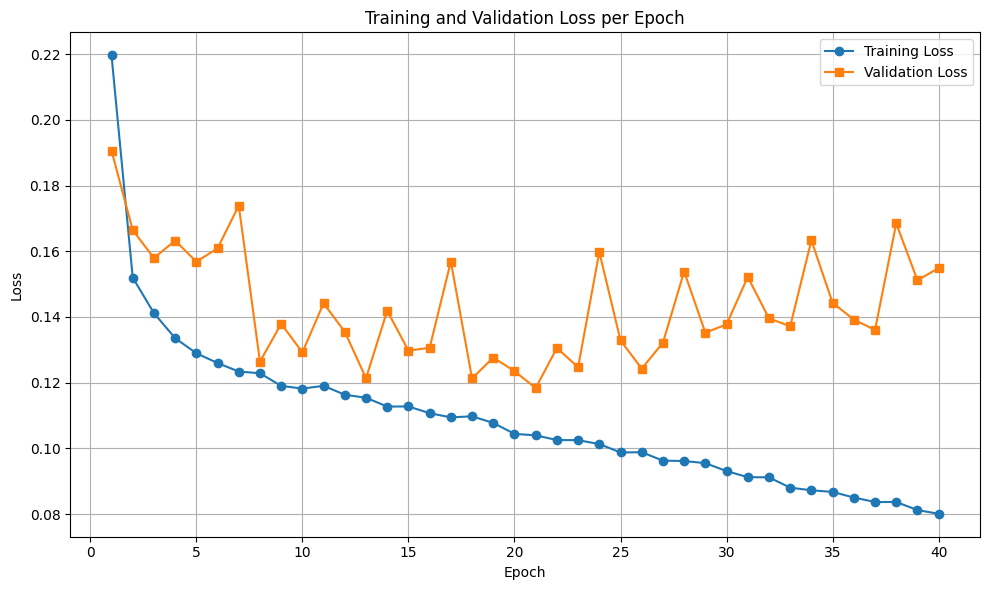

Data successfully read from file:
Number of epochs: 40
Epoch range: 1 to 40
Training loss range: 0.080104 to 0.219642
Validation loss range: 0.118366 to 0.190617


In [ ]:
import matplotlib.pyplot as plt

# Read data from losses.txt file
epochs = []
training_loss = []
validation_loss = []

with open('/content/drive/MyDrive/analysis/model_losses.txt', 'r') as file:
    for line in file:
        # Split the line by whitespace and extract epoch, training loss, and validation loss
        parts = line.strip().split()
        if len(parts) >= 3:  # Ensure we have at least 3 values per line
            epoch = int(parts[0])
            train_loss = float(parts[1])
            val_loss = float(parts[2])

            epochs.append(epoch)
            training_loss.append(train_loss)
            validation_loss.append(val_loss)

# Plotting the training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss per Epoch')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Print the data to verify it was read correctly
print("Data successfully read from file:")
print(f"Number of epochs: {len(epochs)}")
print(f"Epoch range: {min(epochs)} to {max(epochs)}")
print(f"Training loss range: {min(training_loss):.6f} to {max(training_loss):.6f}")
print(f"Validation loss range: {min(validation_loss):.6f} to {max(validation_loss):.6f}")

In [ ]:
!python /content/evaluate.py --injection-file /content/drive/MyDrive/analysis/injected_signals_half.hdf --foreground-events /content/drive/MyDrive/analysis/fg_trriger_4.hdf \
                   --foreground-files /content/drive/MyDrive/analysis/foreground_data_half.hdf --background-events /content/drive/MyDrive/analysis/bg_trriger_4.hdf \
                   --output-file eval_tn_fn.hdf  --verbose

INFO | 14-08-2025 08:34:50: Finding injections contained in data
INFO | 14-08-2025 08:34:50: Reading injections from /content/drive/MyDrive/analysis/injected_signals_half.hdf
INFO | 14-08-2025 08:34:50: Reading foreground events from ['/content/drive/MyDrive/analysis/fg_trriger_4.hdf']
INFO | 14-08-2025 08:34:50: Reading background events from ['/content/drive/MyDrive/analysis/bg_trriger_4.hdf']
INFO | 14-08-2025 08:34:51: Sorting foreground event times
INFO | 14-08-2025 08:34:51: Finding injection times closest to event times
INFO | 14-08-2025 08:34:51: Finding true- and false-positives
INFO | 14-08-2025 08:34:51: Calculating foreground FAR
INFO | 14-08-2025 08:34:51: Calculating background FAR
Determining found injections: 100% 794/794 [00:00<00:00, 155373.58it/s]
INFO | 14-08-2025 08:34:51: Calculating sensitivity
INFO | 14-08-2025 08:34:51: Writing output to eval_tn_fn.hdf


In [ ]:
!python /content/sensitivity_plot.py --files eval_tn_fn.hdf --injection-files /content/drive/MyDrive/analysis/injected_signals_half.hdf --foreground-events /content/drive/MyDrive/analysis/fg_trriger_4.hdf --output /content/drive/MyDrive/analysis/recall_vs_sensitivity.png \
    --labels "CNN Model" "Baseline" \
    --verbose --show

In [ ]:
!python evaluate.py --injection-file /content/drive/MyDrive/analysis/injected_signals_half.hdf --foreground-events /content/drive/MyDrive/analysis/fg_trriger_4.hdf --foreground-files /content/drive/MyDrive/analysis/foreground_data_half.hdf --background-events /content/drive/MyDrive/analysis/bg_trriger_4.hdf --output-file /content/drive/MyDrive/analysis/trrig_eval_tar4.hdf --verbose --force

INFO | 14-08-2025 16:26:08: Finding injections contained in data
INFO | 14-08-2025 16:26:08: Reading injections from /content/drive/MyDrive/analysis/injected_signals_half.hdf
INFO | 14-08-2025 16:26:09: Reading foreground events from ['/content/drive/MyDrive/analysis/fg_trriger_4.hdf']
INFO | 14-08-2025 16:26:09: Reading background events from ['/content/drive/MyDrive/analysis/bg_trriger_4.hdf']
INFO | 14-08-2025 16:26:09: Sorting foreground event times
INFO | 14-08-2025 16:26:09: Finding injection times closest to event times
INFO | 14-08-2025 16:26:09: Finding true- and false-positives
INFO | 14-08-2025 16:26:09: Calculating foreground FAR
INFO | 14-08-2025 16:26:09: Calculating foreground TAR
INFO | 14-08-2025 16:26:09: Calculating background FAR
Determining found injections: 100% 794/794 [00:00<00:00, 125718.29it/s]
INFO | 14-08-2025 16:26:09: Calculating sensitivity
INFO | 14-08-2025 16:26:09: Writing output to /content/drive/MyDrive/analysis/trrig_eval_tar4.hdf


In [ ]:
!python /content/ml-gw-search/mlgwsc-1/ml-mock-data-challenge-1/contributions/sensitivity_plot.py --files /content/drive/MyDrive/analysis/trrig_eval_tar4.hdf --no-legend  --output /content/drive/MyDrive/analysis/eval_sensi_tar4.pdf  --far-scaling-factor 86400 --xlabel 'True alarms [1/day]' --show --force --no-tex

Figure(1920x1080)


In [ ]:
!python evaluate.py --injection-file /content/drive/MyDrive/analysis/injected_signals_half.hdf --foreground-events /content/drive/MyDrive/analysis/fg_trriger_8.hdf --foreground-files /content/drive/MyDrive/analysis/foreground_data_half.hdf --background-events /content/drive/MyDrive/analysis/bg_trriger_8.hdf --output-file /content/drive/MyDrive/analysis/trrig_eval_tar8.hdf --verbose --force

INFO | 14-08-2025 16:42:04: Finding injections contained in data
INFO | 14-08-2025 16:42:04: Reading injections from /content/drive/MyDrive/analysis/injected_signals_half.hdf
INFO | 14-08-2025 16:42:04: Reading foreground events from ['/content/drive/MyDrive/analysis/fg_trriger_8.hdf']
INFO | 14-08-2025 16:42:04: Reading background events from ['/content/drive/MyDrive/analysis/bg_trriger_8.hdf']
INFO | 14-08-2025 16:42:05: Sorting foreground event times
INFO | 14-08-2025 16:42:05: Finding injection times closest to event times
INFO | 14-08-2025 16:42:05: Finding true- and false-positives
INFO | 14-08-2025 16:42:05: Calculating foreground FAR
INFO | 14-08-2025 16:42:05: Calculating foreground TAR
INFO | 14-08-2025 16:42:05: Calculating background FAR
Determining found injections: 100% 794/794 [00:00<00:00, 61988.63it/s]
INFO | 14-08-2025 16:42:05: Calculating sensitivity
INFO | 14-08-2025 16:42:05: Writing output to /content/drive/MyDrive/analysis/trrig_eval_tar8.hdf


#8.<b> Plotting TAR (true alarm rate) which shows true positve of the model

In [ ]:
!python /content/sensitivity_plot.py --files /content/drive/MyDrive/analysis/trrig_eval_tar8.hdf --no-legend  --output /content/drive/MyDrive/analysis/eval_sensi_tar8.pdf  --far-scaling-factor 86400 --xlabel 'True alarms [1/day]' --show --force --no-tex

Figure(2320x1480)


In [ ]:
!python /content/sensitivity_plot.py --files /content/drive/MyDrive/analysis/trrig_eval_tar4.hdf --no-legend  --output /content/drive/MyDrive/analysis/eval_sensi_tar4.pdf  --far-scaling-factor 86400 --xlabel 'True alarms [1/day]' --show --force --no-tex

Figure(2320x1480)


In [ ]:
!python /content/ml-gw-search/mlgwsc-1/ml-mock-data-challenge-1/contributions/plot_found_missed.py --foreground /content/drive/MyDrive/analysis/foreground_data_half.hdf --events /content/drive/MyDrive/analysis/fg_trriger_8.hdf --injections /content/drive/MyDrive/analysis/injected_signals_half.hdf --output-found /content/drive/MyDrive/analysis/found-dist8.pdf --output-missed /content/drive/MyDrive/analysis/missed-dist8.pdf --parameters distance --verbose --force

INFO | 18-08-2025 15:55:53: Finding injections contained in data
INFO | 18-08-2025 15:55:53: Reading injections from /content/drive/MyDrive/analysis/injected_signals_half.hdf
INFO | 18-08-2025 15:55:53: Reading events from ['/content/drive/MyDrive/analysis/fg_trriger_8.hdf']
INFO | 18-08-2025 15:55:53: Finding injection times closest to event times
INFO | 18-08-2025 15:55:53: Determining found injections
INFO | 18-08-2025 15:55:53: Plotting found injections
/usr/local/lib/python3.11/dist-packages/matplotlib_inline/backend_inline.py:27: UserWarning: The Figure parameters 'tight_layout' and 'constrained_layout' cannot be used together. Please use 'layout' parameter
  return new_figure_manager_given_figure(num, FigureClass(*args, **kwargs))
INFO | 18-08-2025 15:55:54: Stored plot of found injections at /content/drive/MyDrive/analysis/found-dist8.pdf
INFO | 18-08-2025 15:55:54: Plotting missed injections
/usr/local/lib/python3.11/dist-packages/matplotlib_inline/backend_inline.py:27: UserWa

In [ ]:
!python /content/ml-gw-search/mlgwsc-1/ml-mock-data-challenge-1/contributions/plot_found_missed.py --foreground /content/drive/MyDrive/analysis/foreground_data_half.hdf --events /content/drive/MyDrive/analysis/fg_trriger_4.hdf --injections /content/drive/MyDrive/analysis/injected_signals_half.hdf --output-found /content/drive/MyDrive/analysis/found-dist4.pdf --output-missed /content/drive/MyDrive/analysis/missed-dist4.pdf --parameters distance --verbose --force

INFO | 18-08-2025 15:55:58: Finding injections contained in data
INFO | 18-08-2025 15:55:58: Reading injections from /content/drive/MyDrive/analysis/injected_signals_half.hdf
INFO | 18-08-2025 15:55:58: Reading events from ['/content/drive/MyDrive/analysis/fg_trriger_4.hdf']
INFO | 18-08-2025 15:55:58: Finding injection times closest to event times
INFO | 18-08-2025 15:55:58: Determining found injections
INFO | 18-08-2025 15:55:58: Plotting found injections
/usr/local/lib/python3.11/dist-packages/matplotlib_inline/backend_inline.py:27: UserWarning: The Figure parameters 'tight_layout' and 'constrained_layout' cannot be used together. Please use 'layout' parameter
  return new_figure_manager_given_figure(num, FigureClass(*args, **kwargs))
INFO | 18-08-2025 15:55:59: Stored plot of found injections at /content/drive/MyDrive/analysis/found-dist4.pdf
INFO | 18-08-2025 15:55:59: Plotting missed injections
/usr/local/lib/python3.11/dist-packages/matplotlib_inline/backend_inline.py:27: UserWa

In [ ]:
!python /content/ml-gw-search/mlgwsc-1/ml-mock-data-challenge-1/contributions/plot_found_missed.py --foreground /content/drive/MyDrive/analysis/foreground_data_half.hdf --events /content/drive/MyDrive/analysis/fg_trriger_8.hdf --injections /content/drive/MyDrive/analysis/injected_signals_half.hdf --output-found /content/drive/MyDrive/analysis/found-mchirp8.pdf --output-missed /content/drive/MyDrive/analysis/missed-mchirp8.pdf --parameters mchirp --verbose --force

INFO | 18-08-2025 16:00:39: Finding injections contained in data
INFO | 18-08-2025 16:00:39: Reading injections from /content/drive/MyDrive/analysis/injected_signals_half.hdf
INFO | 18-08-2025 16:00:39: Reading events from ['/content/drive/MyDrive/analysis/fg_trriger_8.hdf']
INFO | 18-08-2025 16:00:39: Finding injection times closest to event times
INFO | 18-08-2025 16:00:39: Determining found injections
INFO | 18-08-2025 16:00:39: Plotting found injections
/usr/local/lib/python3.11/dist-packages/matplotlib_inline/backend_inline.py:27: UserWarning: The Figure parameters 'tight_layout' and 'constrained_layout' cannot be used together. Please use 'layout' parameter
  return new_figure_manager_given_figure(num, FigureClass(*args, **kwargs))
INFO | 18-08-2025 16:00:41: Stored plot of found injections at /content/drive/MyDrive/analysis/found-mchirp8.pdf
INFO | 18-08-2025 16:00:41: Plotting missed injections
/usr/local/lib/python3.11/dist-packages/matplotlib_inline/backend_inline.py:27: User

In [4]:
!python /content/plot_found_missed.py --foreground /content/drive/MyDrive/analysis/foreground_data_half.hdf --events /content/drive/MyDrive/analysis/fg_trriger_4.hdf --injections /content/drive/MyDrive/analysis/injected_signals_half.hdf --output-found /content/drive/MyDrive/analysis/found-mchirp4.pdf --output-missed /content/drive/MyDrive/analysis/missed-mchirp4.pdf --parameters mchirp --verbose --force

INFO | 19-08-2025 04:12:04: Finding injections contained in data
INFO | 19-08-2025 04:12:04: Reading injections from /content/drive/MyDrive/analysis/injected_signals_half.hdf
INFO | 19-08-2025 04:12:04: Reading events from ['/content/drive/MyDrive/analysis/fg_trriger_4.hdf']
INFO | 19-08-2025 04:12:04: Finding injection times closest to event times
INFO | 19-08-2025 04:12:04: Determining found injections
INFO | 19-08-2025 04:12:04: Plotting found injections
/usr/local/lib/python3.11/dist-packages/matplotlib_inline/backend_inline.py:27: UserWarning: The Figure parameters 'tight_layout' and 'constrained_layout' cannot be used together. Please use 'layout' parameter
  return new_figure_manager_given_figure(num, FigureClass(*args, **kwargs))
INFO | 19-08-2025 04:12:06: Stored plot of found injections at /content/drive/MyDrive/analysis/found-mchirp4.pdf
INFO | 19-08-2025 04:12:06: Plotting missed injections
/usr/local/lib/python3.11/dist-packages/matplotlib_inline/backend_inline.py:27: User

In [ ]:
!python /content/ml-gw-search/mlgwsc-1/ml-mock-data-challenge-1/contributions/plot_found_missed.py --foreground /content/drive/MyDrive/analysis/foreground_data_half.hdf --events /content/drive/MyDrive/analysis/fg_trriger_4.hdf --injections /content/drive/MyDrive/analysis/injected_signals_half.hdf --output-found /content/drive/MyDrive/analysis/found-dist-mchirp4.pdf --output-missed /content/drive/MyDrive/analysis/missed-dist-mchirp4.pdf --parameters distance mchirp --verbose --force

INFO | 18-08-2025 16:50:17: Finding injections contained in data
INFO | 18-08-2025 16:50:17: Reading injections from /content/drive/MyDrive/analysis/injected_signals_half.hdf
INFO | 18-08-2025 16:50:17: Reading events from ['/content/drive/MyDrive/analysis/fg_trriger_4.hdf']
INFO | 18-08-2025 16:50:17: Finding injection times closest to event times
INFO | 18-08-2025 16:50:17: Determining found injections
INFO | 18-08-2025 16:50:18: Plotting found injections
/usr/local/lib/python3.11/dist-packages/matplotlib_inline/backend_inline.py:27: UserWarning: The Figure parameters 'tight_layout' and 'constrained_layout' cannot be used together. Please use 'layout' parameter
  return new_figure_manager_given_figure(num, FigureClass(*args, **kwargs))
INFO | 18-08-2025 16:50:19: Stored plot of found injections at /content/drive/MyDrive/analysis/found-dist-mchirp4.pdf
INFO | 18-08-2025 16:50:19: Plotting missed injections
/usr/local/lib/python3.11/dist-packages/matplotlib_inline/backend_inline.py:27:

In [ ]:
!python /content/ml-gw-search/mlgwsc-1/ml-mock-data-challenge-1/contributions/plot_found_missed.py --foreground /content/drive/MyDrive/analysis/foreground_data_half.hdf --events /content/drive/MyDrive/analysis/fg_trriger_8.hdf --injections /content/drive/MyDrive/analysis/injected_signals_half.hdf --output-found /content/drive/MyDrive/analysis/found-dist-mchirp8.pdf --output-missed /content/drive/MyDrive/analysis/missed-dist-mchirp8.pdf --parameters distance mchirp --verbose --force

INFO | 18-08-2025 16:51:34: Finding injections contained in data
INFO | 18-08-2025 16:51:34: Reading injections from /content/drive/MyDrive/analysis/injected_signals_half.hdf
INFO | 18-08-2025 16:51:34: Reading events from ['/content/drive/MyDrive/analysis/fg_trriger_8.hdf']
INFO | 18-08-2025 16:51:34: Finding injection times closest to event times
INFO | 18-08-2025 16:51:34: Determining found injections
INFO | 18-08-2025 16:51:35: Plotting found injections
/usr/local/lib/python3.11/dist-packages/matplotlib_inline/backend_inline.py:27: UserWarning: The Figure parameters 'tight_layout' and 'constrained_layout' cannot be used together. Please use 'layout' parameter
  return new_figure_manager_given_figure(num, FigureClass(*args, **kwargs))
INFO | 18-08-2025 16:51:37: Stored plot of found injections at /content/drive/MyDrive/analysis/found-dist-mchirp8.pdf
INFO | 18-08-2025 16:51:37: Plotting missed injections
/usr/local/lib/python3.11/dist-packages/matplotlib_inline/backend_inline.py:27: